# Дашборд конверсий

In [395]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import os

## I этап. Предварительная выгрузка и базовый анализ данных

### Выгрузка данных по визитам

In [398]:
visits_df = pd.read_csv('https://drive.google.com/uc?id=1QosQQ4RRNR9rkL4t7sB707h2Uy0XfYJe')
visits_df.head(1000000)

uuid platform  \
0    1de9ea66-70d3-4a1f-8735-df5ef7697fb9      web   
1    f149f542-e935-4870-9734-6b4501eaf614      web   
2    f149f542-e935-4870-9734-6b4501eaf614      web   
3    08f0ebd4-950c-4dd9-8e97-b5bdf073eed1      web   
4    08f0ebd4-950c-4dd9-8e97-b5bdf073eed1      web   
..                                    ...      ...   
995  8bc047ac-dc03-4a61-8037-7371f729fa34      web   
996  8bc047ac-dc03-4a61-8037-7371f729fa34      web   
997  3f78ac76-6f81-43ec-85e8-f3cf74fc8fdc      web   
998  3f78ac76-6f81-43ec-85e8-f3cf74fc8fdc      web   
999  1408b7ab-6450-4337-b57d-fd8a64b7fe97      web   

                                            user_agent                 date  
0    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...  2023-03-01T13:29:22  
1    Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) Apple...  2023-03-01T16:44:28  
2    Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) Apple...  2023-03-06T06:12:36  
3    Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109...  2023-03-01T20:16:37  
4    Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109...  2023-03-05T17:42:47  
..                                                 ...                  ...  
995  Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:15....  2023-03-02T23:57:06  
996  Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:15....  2023-03-07T23:05:08  
997  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...  2023-03-02T12:47:09  
998  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...  2023-03-07T00:07:34  
999  Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...  2023-03-02T10:10:51  

[1000 rows x 4 columns]

In [399]:
visits_df.describe(include='all')

uuid platform  \
count                                   1000     1000   
unique                                   519        3   
top     251a0926-ece3-4d77-aa42-ab569fdf9fe2      web   
freq                                       4      954   

                                               user_agent                 date  
count                                                1000                 1000  
unique                                                 28                  996  
top     Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...  2023-03-01T08:01:45  
freq                                                   71                    2

In [400]:
visits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   uuid        1000 non-null   object
 1   platform    1000 non-null   object
 2   user_agent  1000 non-null   object
 3   date        1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


***


### Выгрузка данных по регистрациям

In [403]:
regs_df = pd.read_csv('https://drive.google.com/uc?id=1AeQz0kaSgz0lxYSDtuNm36muhy5fRCzZ')
regs_df.head(1000000)

date  user_id                    email platform  \
0    2023-03-01T00:25:39  8838849     joseph95@example.org      web   
1    2023-03-01T14:53:01  8741065  janetsuarez@example.net      web   
2    2023-03-01T14:27:36  1866654     robert67@example.org      web   
3    2023-03-01T02:42:34  1577584         elam@example.net      web   
4    2023-03-01T10:27:14  4765395  stephanie68@example.net      web   
..                   ...      ...                      ...      ...   
995  2023-03-05T03:19:40  6414793  jerryrivera@example.com  android   
996  2023-03-05T15:03:48    53167      laura65@example.net  android   
997  2023-03-05T09:51:08  4969623    jasmine42@example.net  android   
998  2023-03-05T16:25:59  7636873  imclaughlin@example.net  android   
999  2023-03-05T11:17:41  7551697  jacobgarcia@example.org  android   

    registration_type  
0              google  
1              yandex  
2              google  
3               apple  
4              yandex  
..                ...  
995            google  
996            google  
997             email  
998            google  
999            google  

[1000 rows x 5 columns]

In [404]:
regs_df.describe(include='all')

date       user_id                  email platform  \
count                  1000  1.000000e+03                   1000     1000   
unique                 1000           NaN                    997        3   
top     2023-03-01T00:25:39           NaN  zanderson@example.org  android   
freq                      1           NaN                      2      517   
mean                    NaN  4.488623e+06                    NaN      NaN   
std                     NaN  2.620568e+06                    NaN      NaN   
min                     NaN  2.236800e+04                    NaN      NaN   
25%                     NaN  2.235489e+06                    NaN      NaN   
50%                     NaN  4.473044e+06                    NaN      NaN   
75%                     NaN  6.779707e+06                    NaN      NaN   
max                     NaN  8.881772e+06                    NaN      NaN   

       registration_type  
count               1000  
unique                 4  
top                email  
freq                 446  
mean                 NaN  
std                  NaN  
min                  NaN  
25%                  NaN  
50%                  NaN  
75%                  NaN  
max                  NaN

In [405]:
regs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               1000 non-null   object
 1   user_id            1000 non-null   int64 
 2   email              1000 non-null   object
 3   platform           1000 non-null   object
 4   registration_type  1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


---

---

## II этап. Запросы к API

In [409]:
# GET https://data-charts-api.hexlet.app/registrations?begin=2022-06-01&end=2023-06-02
# start -> 2023-03-01
# end -> 2023-09-01

API = 'https://data-charts-api.hexlet.app'
START = '2023-03-01'
END = '2023-09-01'

response_visits = requests.get(f"{API}/visits?begin={START}&end={END}")
response_regs = requests.get(f"{API}/registrations?begin={START}&end={END}")
visits = pd.DataFrame(response_visits.json())
regs = pd.DataFrame(response_regs.json())

visits.head(1000000)

visit_id platform  \
0       1de9ea66-70d3-4a1f-8735-df5ef7697fb9      web   
1       f149f542-e935-4870-9734-6b4501eaf614      web   
2       08f0ebd4-950c-4dd9-8e97-b5bdf073eed1      web   
3       19322fed-157c-49c6-b16e-2d5cabeb9592      web   
4       04762a22-3c9f-40c9-9ac9-6628c4381836      web   
...                                      ...      ...   
263454  6d2e2f5b-970b-4dfe-8f57-25711a5b2a5d      web   
263455  1d91535e-d984-4f76-bbaa-c14c0fd4f2e2      web   
263456  f2496721-7126-430d-976e-777a6cdccb4f      web   
263457  f2496721-7126-430d-976e-777a6cdccb4f      web   
263458  73047125-de44-4d65-8229-7218acff4ddc      web   

                                               user_agent             datetime  
0       Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...  2023-03-01T10:36:22  
1       Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...  2023-03-01T06:25:00  
2       Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...  2023-03-01T10:26:13  
3       Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...  2023-03-01T12:33:06  
4       Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...  2023-03-01T01:38:35  
...                                                   ...                  ...  
263454  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...  2023-08-29T10:43:29  
263455  Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109...  2023-08-29T19:29:16  
263456  Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...  2023-08-29T12:51:11  
263457  Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...  2023-08-29T21:45:08  
263458  Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109...  2023-08-30T19:19:04  

[263459 rows x 4 columns]

In [410]:
regs.head(1000000)

datetime                               user_id  \
0      2023-03-01T07:40:13  2e0f6bb8-b029-4f45-a786-2b53990d37f1   
1      2023-03-01T13:14:00  f007f97c-9d8b-48b5-af08-119bb8f6d9b6   
2      2023-03-01T03:05:50  24ff46ae-32b3-4a74-8f27-7cf0b8f32f15   
3      2023-03-01T00:04:47  3e9914e1-5d73-4c23-b25d-b59a3aeb2b60   
4      2023-03-01T18:31:52  27f875fc-f8ce-4aeb-8722-0ecb283d0760   
...                    ...                                   ...   
21831  2023-08-31T07:32:08  a94b4a28-f25c-433c-b4ef-85af7d5b0c11   
21832  2023-08-31T23:25:50  fc709c6b-528b-40d8-8980-c2c278e5a628   
21833  2023-08-31T19:29:18  11e32805-7571-4108-8e50-e211d051bf7e   
21834  2023-08-31T19:38:54  bce7b818-768b-434a-b6af-573cd60bff7f   
21835  2023-08-31T08:36:05  fe03e08a-8e86-4b5f-9a50-c18a02b0d234   

                            email platform registration_type  
0               ebyrd@example.org      web            google  
1        knightgerald@example.org      web             email  
2      cherylthompson@example.com      web             apple  
3           halldavid@example.org      web             email  
4            denise86@example.net      web            google  
...                           ...      ...               ...  
21831         ikelley@example.net      ios             apple  
21832     brittanycox@example.net      ios             apple  
21833           aryan@example.net      ios             apple  
21834       emartinez@example.net      ios             email  
21835      terriperry@example.net      ios             email  

[21836 rows x 5 columns]

***

***

## III Этап. Расчет метрик

- Изменение столбца *visits['datetime']* от Object на datetime
- Сортировка по дате
- Удаление дубликатов
- Удаление ботов
- Агрегация по дате и платформе


In [415]:
# Визиты
visits['datetime'] = pd.to_datetime(visits['datetime'])
visits['date_group'] = visits['datetime'].dt.date
visits = visits.sort_values(by='datetime')
visits = visits.drop_duplicates(subset='visit_id', keep='last')
visits_agg = visits.groupby(['date_group', 'platform']).agg('count')
visits = visits[visits['platform'] != 'bot']
visits_agg.head()

visit_id  user_agent  datetime
date_group platform                                
2023-03-01 android         75          75        75
           ios             22          22        22
           web            279         279       279
2023-03-02 android         67          67        67
           ios             31          31        31

In [416]:
# Регистрации
regs['datetime'] = pd.to_datetime(regs['datetime'])
regs['date_group'] = regs['datetime'].dt.date
regs = regs.sort_values(by='datetime')
regs_agg = regs.groupby(['date_group', 'platform']).agg('count')
regs_agg.head()

datetime  user_id  email  registration_type
date_group platform                                             
2023-03-01 android         61       61     61                 61
           ios             18       18     18                 18
           web              8        8      8                  8
2023-03-02 android         59       59     59                 59
           ios             24       24     24                 24

In [417]:
conversion = pd.merge(
    visits_agg['visit_id'],
    regs_agg['user_id'],
    on=['date_group', 'platform'],
    how='outer'
)
conversion['conversion'] = conversion['user_id'] * 100.00 / conversion['visit_id']
conversion = conversion.rename(columns={
    'visit_id': 'visits',
    'user_id': 'registrations'
})

In [418]:
conversion.to_json('./conversion.json')

In [419]:
conversion.head()

visits  registrations  conversion
date_group platform                                   
2023-03-01 android       75           61.0   81.333333
           ios           22           18.0   81.818182
           web          279            8.0    2.867384
2023-03-02 android       67           59.0   88.059701
           ios           31           24.0   77.419355

***

***

## IV Этап. Добавляем рекламу

In [423]:
ads = pd.read_csv('https://drive.google.com/uc?id=12vCtGhJlcK_CBcs8ES3BfEPbk6OJ45Qj')
ads.head()

date utm_source utm_medium                utm_campaign  cost
0  2023-03-01T10:54:41     google        cpc  advanced_algorithms_series   212
1  2023-03-02T10:32:35     google        cpc  advanced_algorithms_series   252
2  2023-03-03T19:21:40     google        cpc  advanced_algorithms_series   202
3  2023-03-04T17:52:04     google        cpc  advanced_algorithms_series   223
4  2023-03-05T05:35:13     google        cpc  advanced_algorithms_series   265

In [424]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          159 non-null    object
 1   utm_source    159 non-null    object
 2   utm_medium    159 non-null    object
 3   utm_campaign  159 non-null    object
 4   cost          159 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 6.3+ KB


In [425]:
ads['date'] = pd.to_datetime(ads['date'])         # Преобразуем оригинальный столбец
ads['date_group'] = ads['date'].dt.date           # Используем dt.date после преобразования

In [426]:
ads_data = ads[['date_group', 'utm_campaign', 'cost']]
ads_data

date_group                utm_campaign  cost
0    2023-03-01  advanced_algorithms_series   212
1    2023-03-02  advanced_algorithms_series   252
2    2023-03-03  advanced_algorithms_series   202
3    2023-03-04  advanced_algorithms_series   223
4    2023-03-05  advanced_algorithms_series   265
..          ...                         ...   ...
154  2023-09-13      intro_to_python_course   277
155  2023-09-14      intro_to_python_course   221
156  2023-09-15      intro_to_python_course   175
157  2023-09-16      intro_to_python_course   224
158  2023-09-17      intro_to_python_course   125

[159 rows x 3 columns]

In [427]:
con = conversion.groupby('date_group').agg('sum')

result = pd.merge(
    con,
    ads_data,
    how='left',
    on='date_group'
)

result = result[['date_group', 'visits', 'registrations', 'cost', 'utm_campaign']]
result['cost'] = result['cost'].fillna(0)
result['utm_campaign'] = result['utm_campaign'].fillna('none')
result

date_group  visits  registrations   cost                utm_campaign
0    2023-03-01     376           87.0  212.0  advanced_algorithms_series
1    2023-03-02     613          106.0  252.0  advanced_algorithms_series
2    2023-03-03     683          107.0  202.0  advanced_algorithms_series
3    2023-03-04     831          159.0  223.0  advanced_algorithms_series
4    2023-03-05     933          115.0  265.0  advanced_algorithms_series
..          ...     ...            ...    ...                         ...
179  2023-08-27     795           88.0  222.0      intro_to_python_course
180  2023-08-28     635           83.0  223.0      intro_to_python_course
181  2023-08-29    1268          143.0  190.0      intro_to_python_course
182  2023-08-30    1328          101.0  109.0      intro_to_python_course
183  2023-08-31     828          124.0  215.0      intro_to_python_course

[184 rows x 5 columns]

In [428]:
result.to_json('./ads.json')

***

***

## V Этап. Визуализация

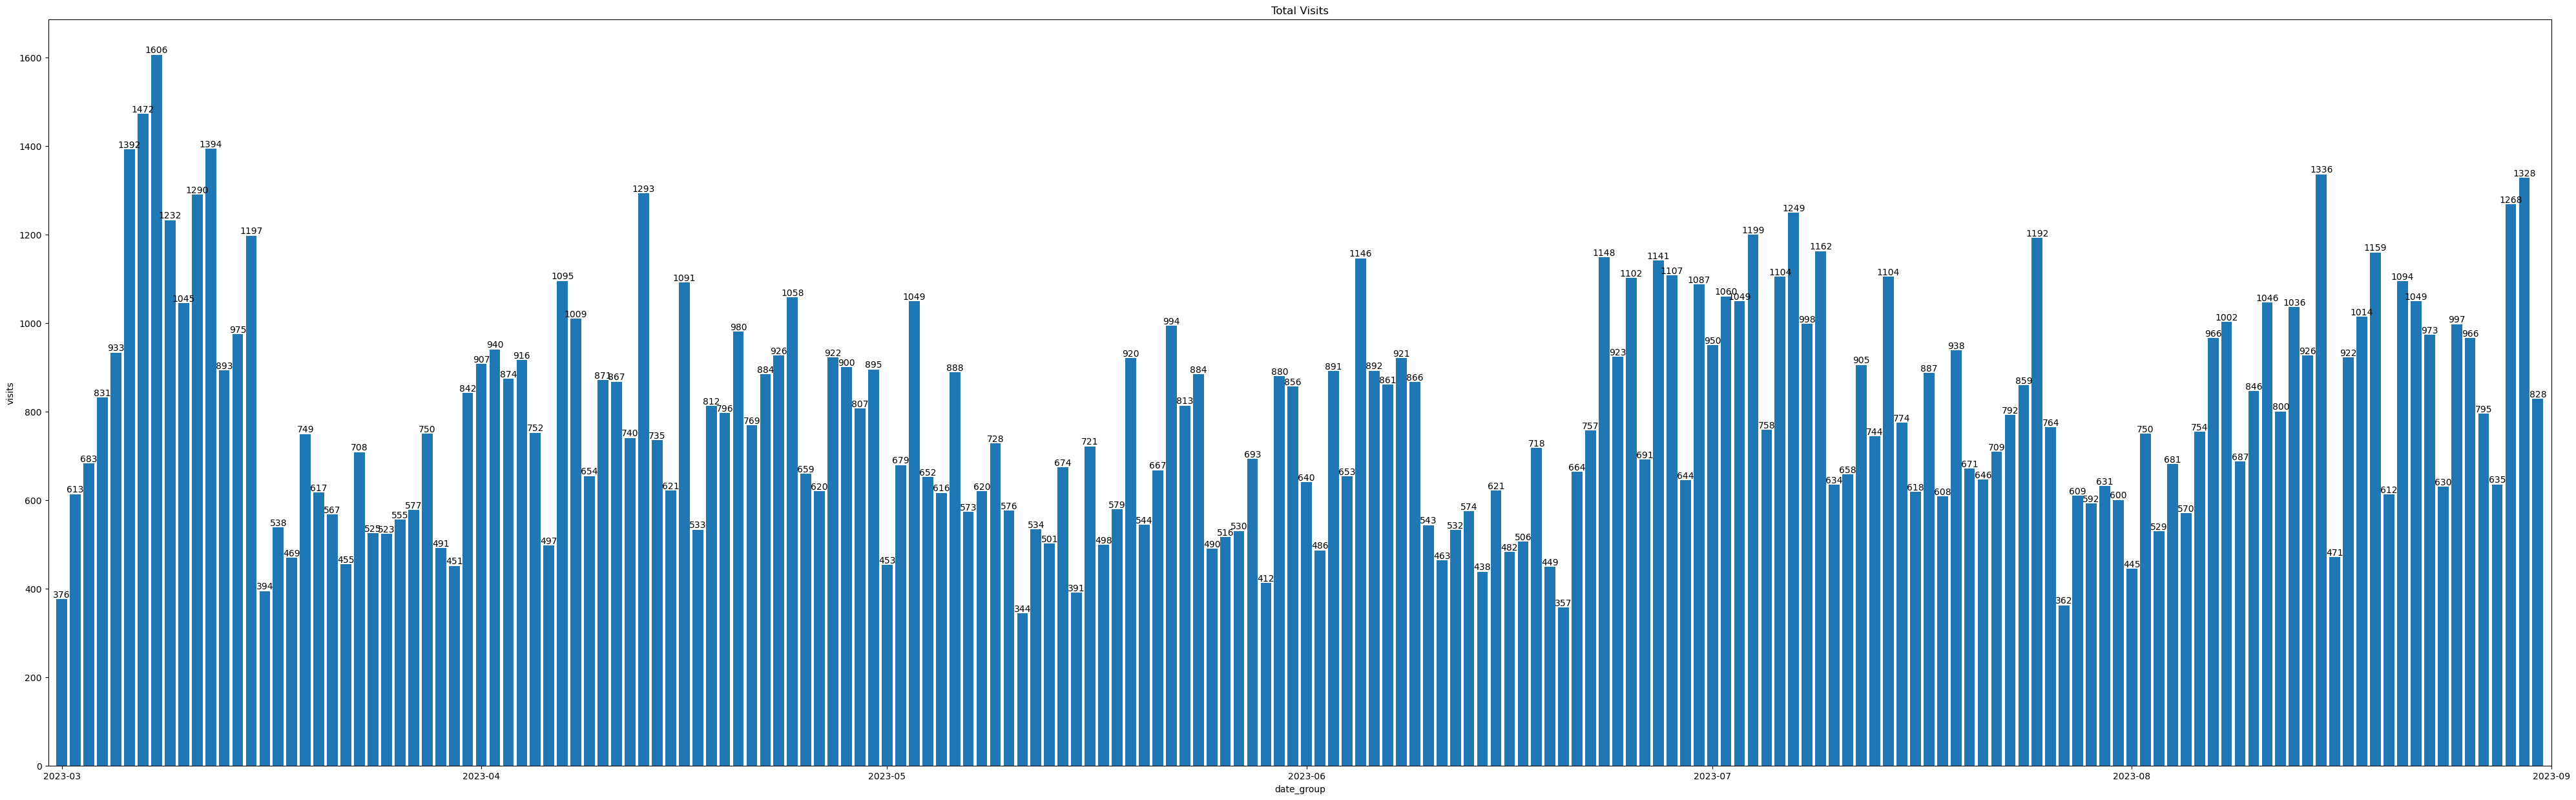

In [432]:
# Общие посещения
ads = pd.read_json('./ads.json')
ads['date_group'] = pd.to_datetime(ads['date_group'], unit='ms')

plt.figure(figsize=(50, 15))

x = result.date_group
y = result.visits

bars = plt.bar(x, y)

plt.xlim(x.iloc[0] - (x.iloc[1] - x.iloc[0]), x.iloc[-1] + (x.iloc[1] - x.iloc[0]))

for bar in bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val, int(y_val), ha='center', va='bottom')

plt.xlabel('date_group')
plt.ylabel('visits')
plt.title('Total Visits')

plt.savefig('./charts/total_visits.png')

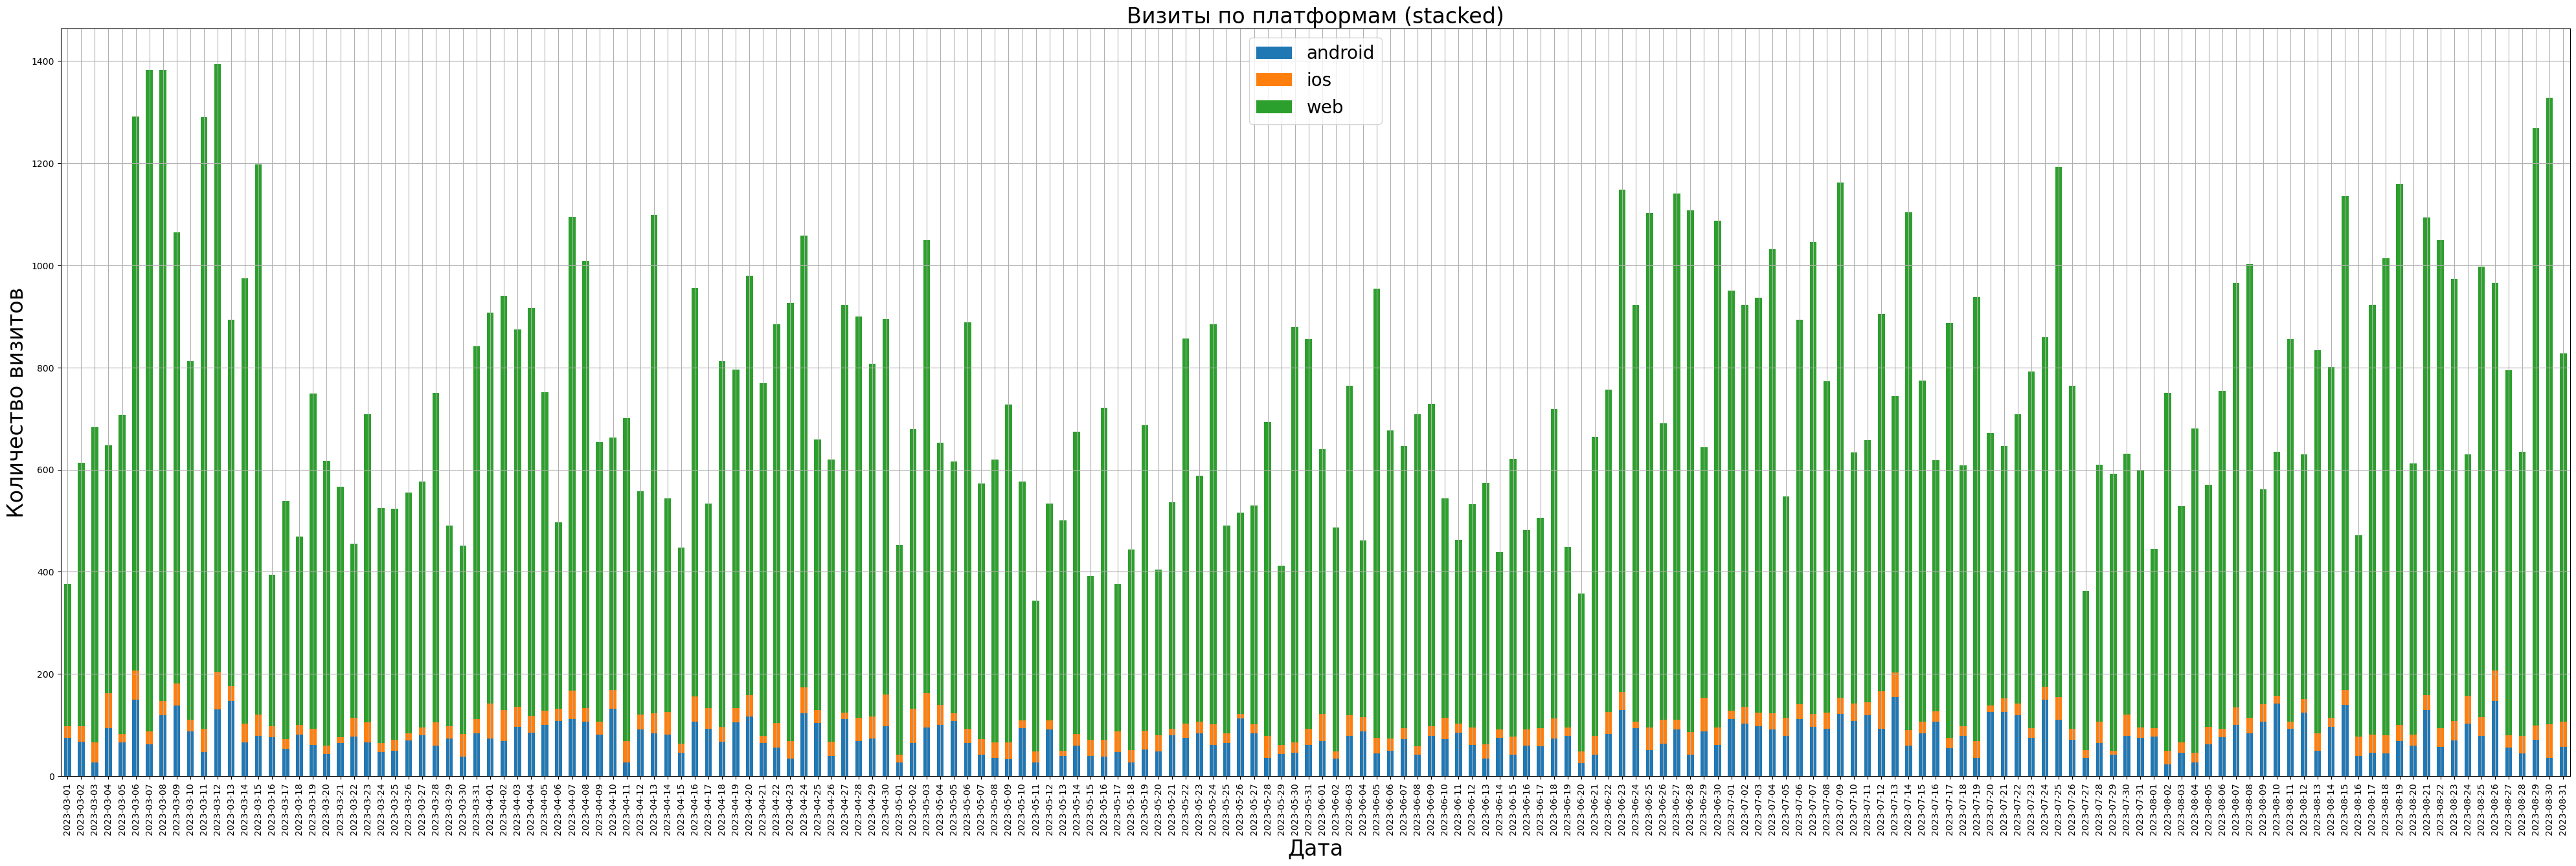

In [433]:
# Сбросим MultiIndex
conversion_reset = conversion.reset_index()

# Переименуем колонки (если они называются level_0, level_1)
conversion_reset.columns = ['date_group', 'platform', 'visits', 'registrations', 'conversion']
conversion_reset = conversion_reset[conversion_reset['platform'] != 'bot']

# Сводная таблица: визиты по дате и платформе
pivot = conversion_reset.pivot_table(
    index='date_group',
    columns='platform',
    values='visits',
    aggfunc='sum'
)

# Строим stacked график
pivot.plot(kind='bar', stacked=True, figsize=(50, 15), grid=True)
plt.title('Визиты по платформам (stacked)', fontsize=24)
plt.xlabel('Дата', fontsize=24)
plt.ylabel('Количество визитов', fontsize=24)
plt.legend(fontsize=20)
plt.savefig('./charts/visits_by_platform.png')

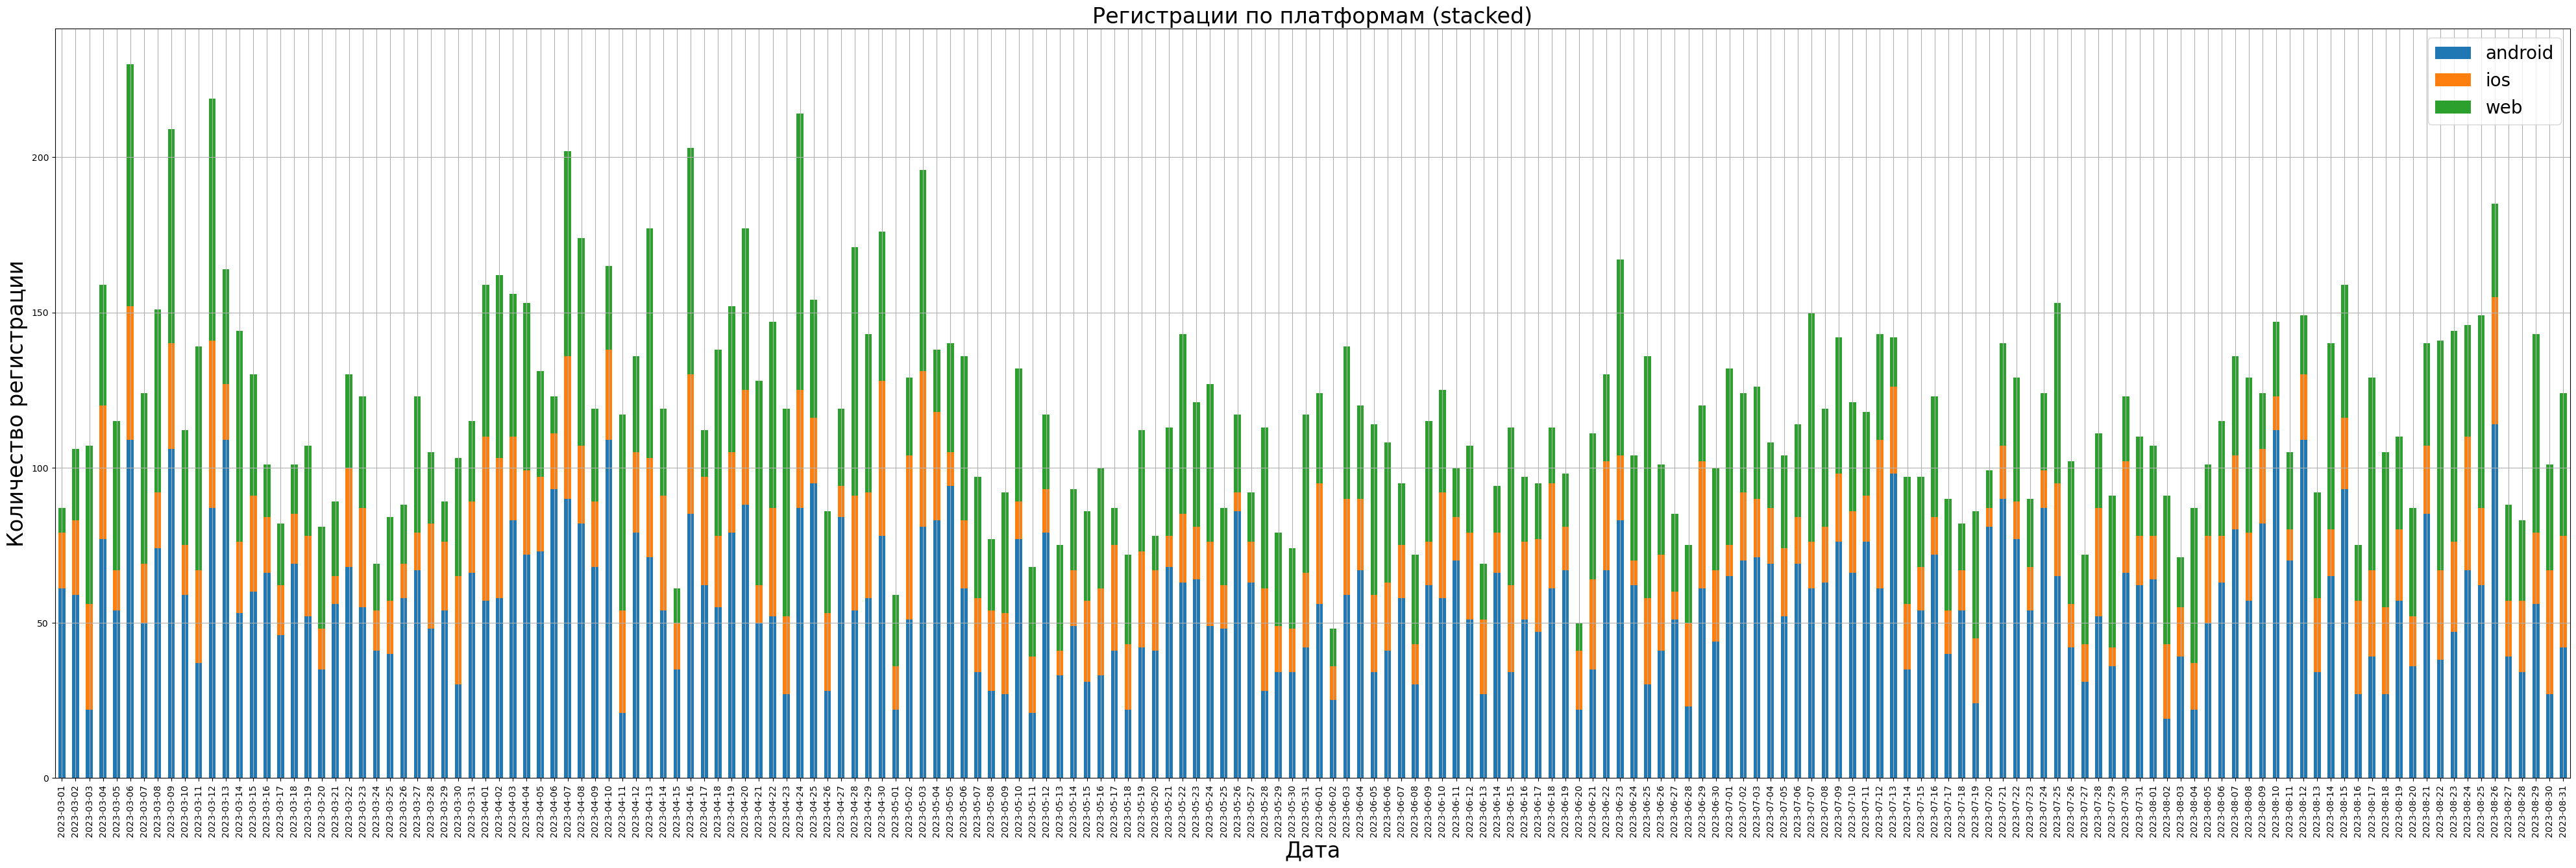

In [434]:
# Сводная таблица: визиты по дате и платформе
pivot_two = conversion_reset.pivot_table(
    index='date_group',
    columns='platform',
    values='registrations',
    aggfunc='sum'
)

# Строим stacked график
pivot_two.plot(kind='bar', stacked=True, figsize=(50, 15), grid=True)
plt.title('Регистрации по платформам (stacked)', fontsize=24)
plt.xlabel('Дата', fontsize=24)
plt.ylabel('Количество регистрации', fontsize=24)
plt.legend(fontsize=20)
plt.savefig('./charts/registrations_by_platform.png')

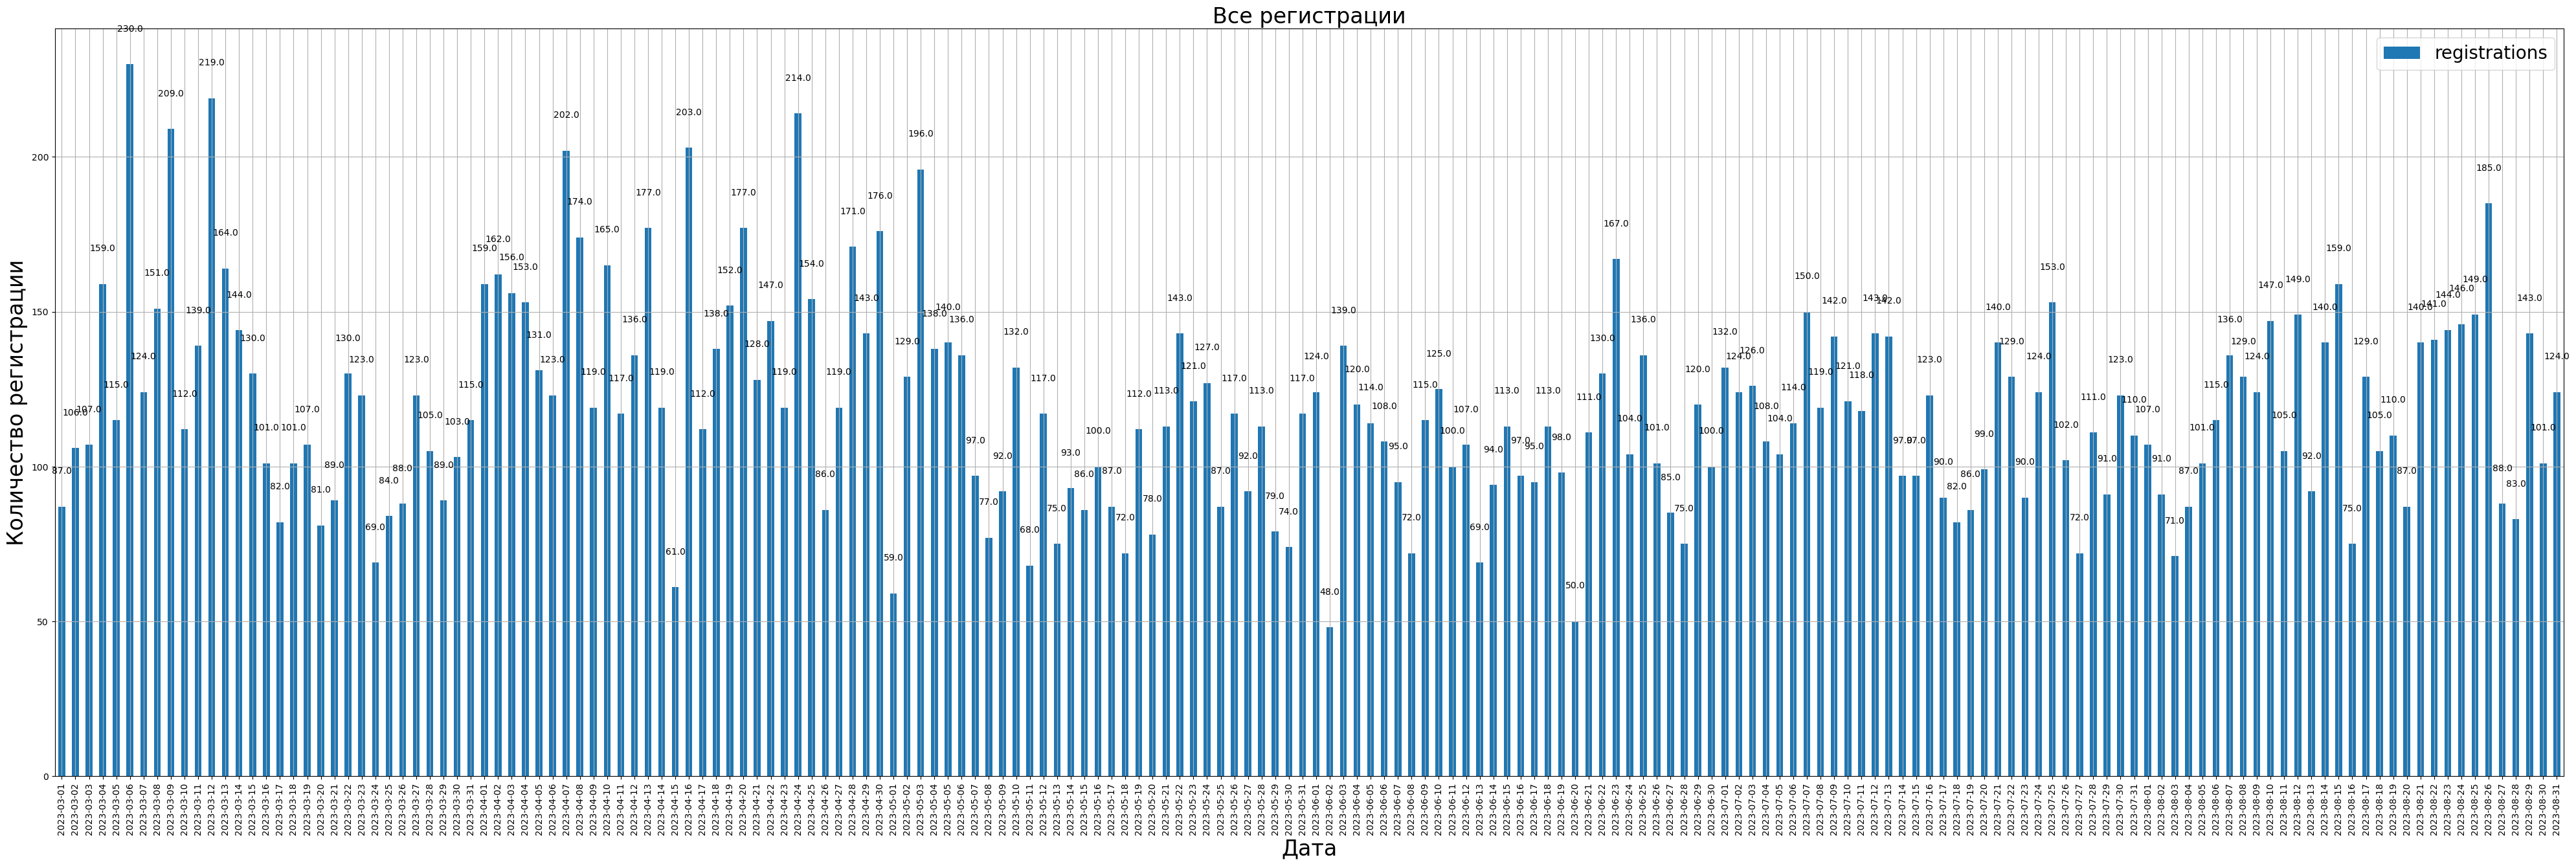

In [435]:
reg_bars = con[['registrations']].plot(kind='bar', figsize=(50, 15), grid=True)

for i, v in enumerate(con['registrations']):
    reg_bars.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=10)

plt.title("Все регистрации", fontsize=24)
plt.xlabel('Дата', fontsize=24)
plt.ylabel('Количество регистрации', fontsize=24)
plt.legend(fontsize=20)
plt.savefig('./charts/registrations.png')

In [436]:
con['conversion'] = con['registrations'] * 100.00 / con['visits']
con

visits  registrations  conversion
date_group                                   
2023-03-01     376           87.0   23.138298
2023-03-02     613          106.0   17.292007
2023-03-03     683          107.0   15.666179
2023-03-04     831          159.0   19.133574
2023-03-05     933          115.0   12.325831
...            ...            ...         ...
2023-08-27     795           88.0   11.069182
2023-08-28     635           83.0   13.070866
2023-08-29    1268          143.0   11.277603
2023-08-30    1328          101.0    7.605422
2023-08-31     828          124.0   14.975845

[184 rows x 3 columns]

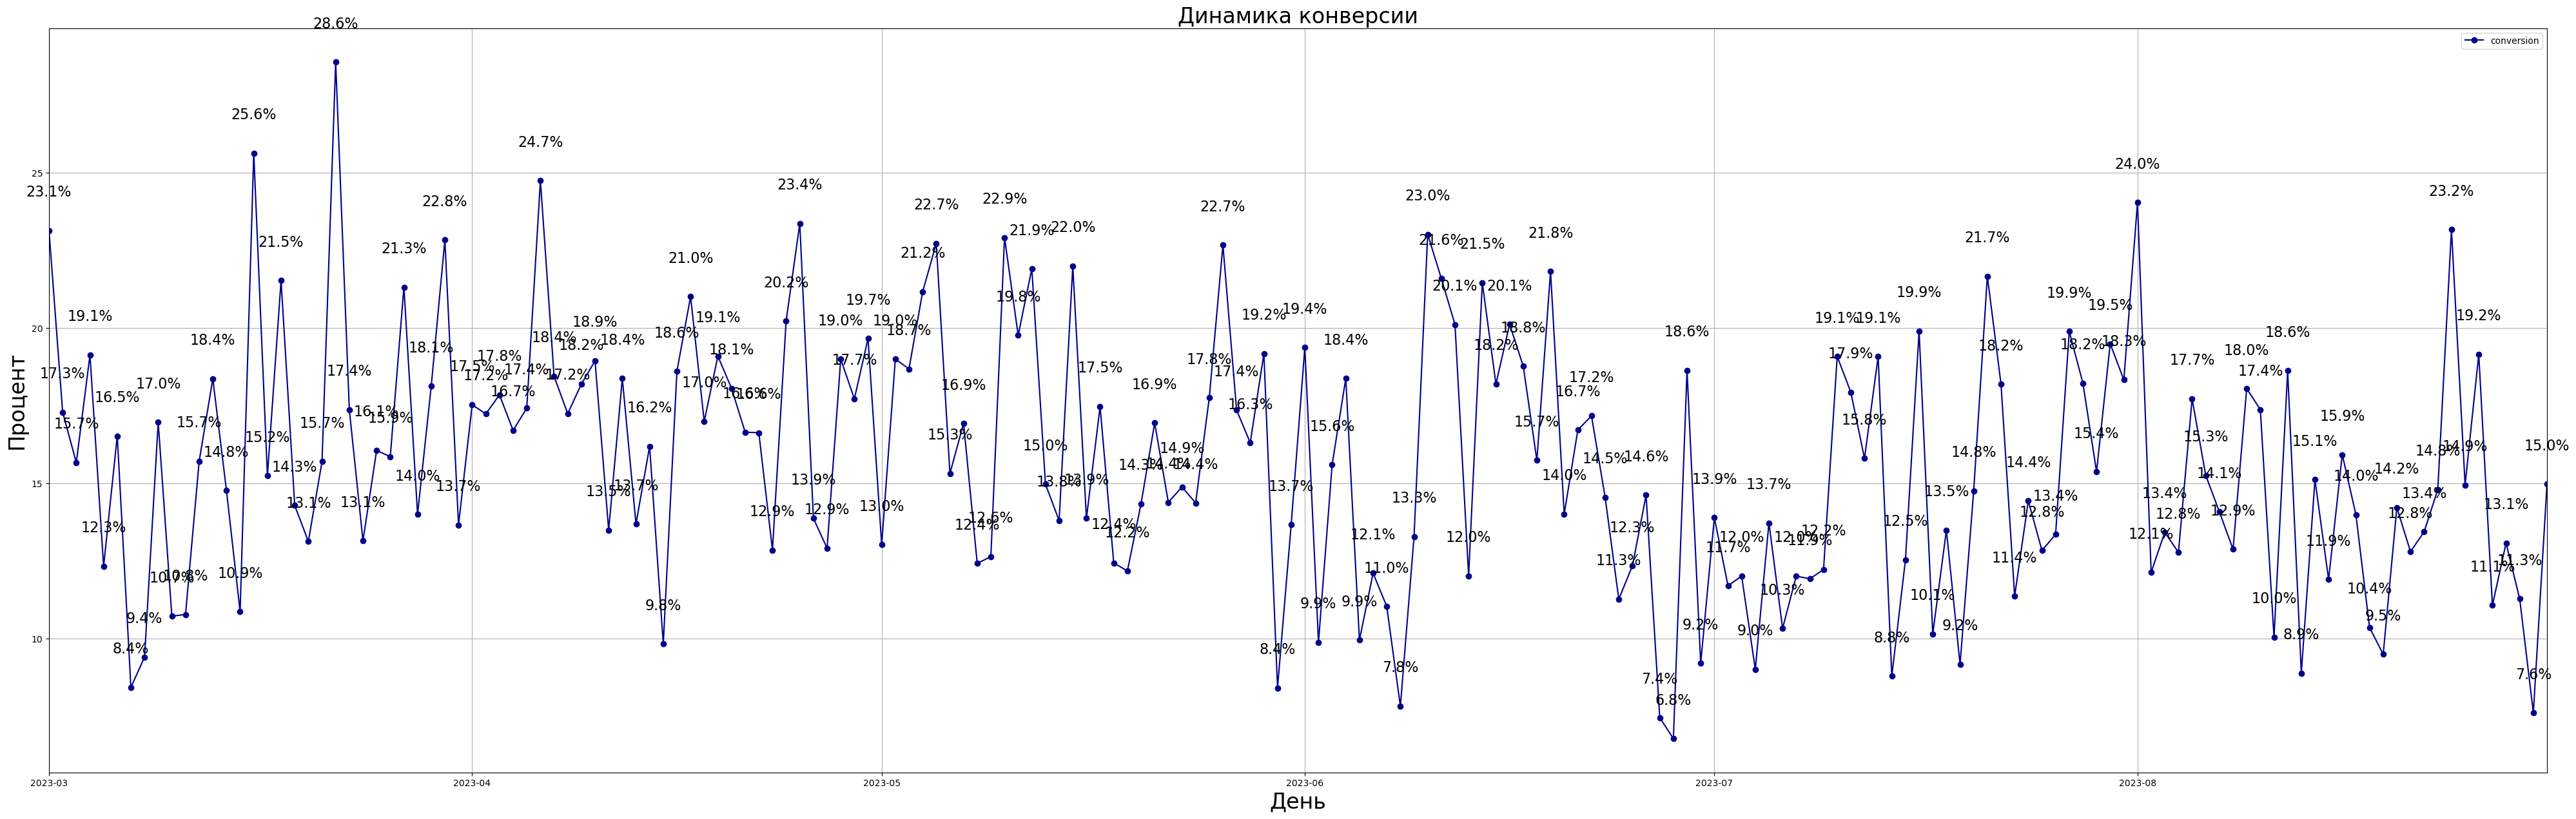

In [437]:
ax = con[['conversion']].plot(kind='line', figsize=(50, 15), grid=True, marker='o', color='darkblue')
ax.set_xlim(left=con.index.min(), right=con.index.max())
ax.set_title("Динамика конверсии", fontsize=24)
ax.set_ylabel("Процент",fontsize=24)
ax.set_xlabel("День", fontsize=24)

for x, y in zip(con.index, con['conversion']):
    ax.text(x, y + 1, f'{y:.1f}%', ha='center', va='bottom', fontsize=16)

plt.savefig("./charts/conversion_dynamics.png")

In [438]:
conversion_reset

date_group platform  visits  registrations  conversion
0    2023-03-01  android      75           61.0   81.333333
1    2023-03-01      ios      22           18.0   81.818182
2    2023-03-01      web     279            8.0    2.867384
3    2023-03-02  android      67           59.0   88.059701
4    2023-03-02      ios      31           24.0   77.419355
..          ...      ...     ...            ...         ...
589  2023-08-30      ios      66           40.0   60.606061
590  2023-08-30      web    1227           34.0    2.770986
591  2023-08-31  android      57           42.0   73.684211
592  2023-08-31      ios      50           36.0   72.000000
593  2023-08-31      web     721           46.0    6.380028

[552 rows x 5 columns]

In [439]:
android = conversion_reset[conversion_reset['platform'] == 'android'][['date_group', 'visits', 'registrations']]
ios = conversion_reset[conversion_reset['platform'] == 'ios'][['date_group', 'visits', 'registrations']]
web = conversion_reset[conversion_reset['platform'] == 'web'][['date_group', 'visits', 'registrations']]

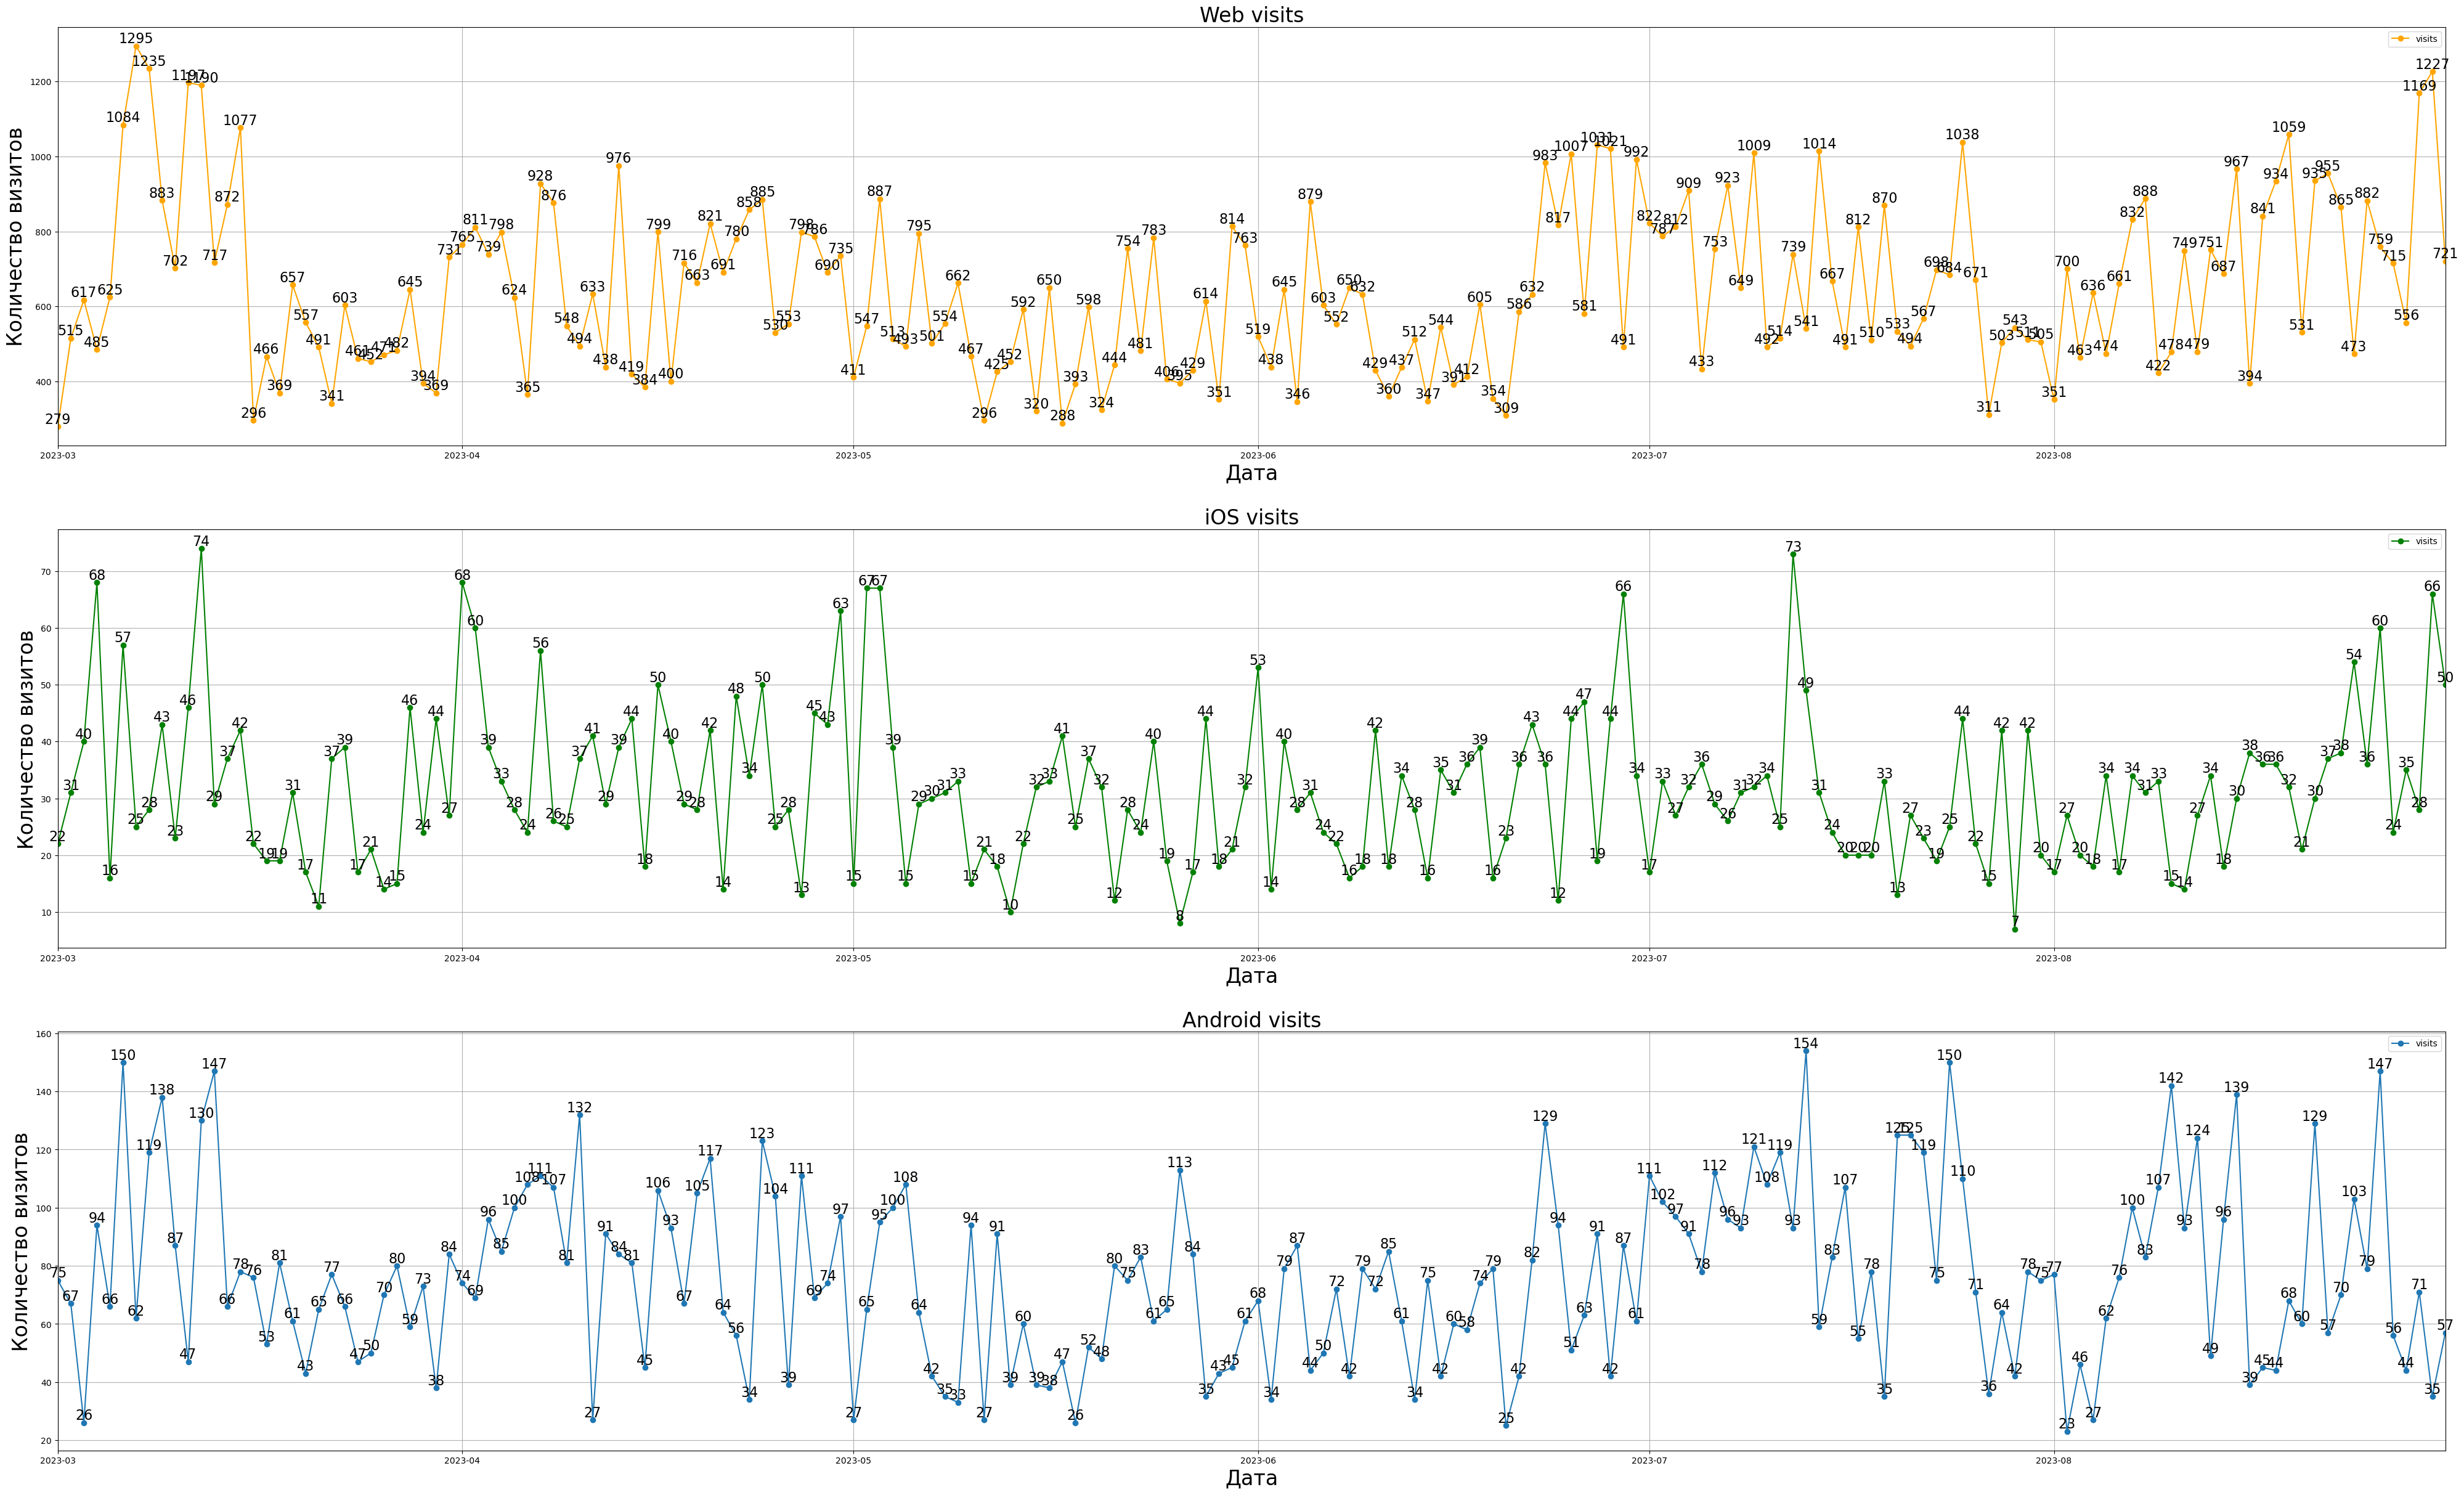

In [440]:
fig, ax = plt.subplots(3, 1, figsize=(50, 30))

android[['date_group', 'visits']].plot(
    kind='line',
    x='date_group',
    y='visits',
    marker='o',
    grid=True,
    ax=ax[2]
)

ios[['date_group', 'visits']].plot(
    kind='line',
    x='date_group',
    y='visits',
    marker='o',
    grid=True,
    ax=ax[1],
    color='green'
)

web[['date_group', 'visits']].plot(
    kind='line',
    x='date_group',
    y='visits',
    marker='o',
    grid=True,
    ax=ax[0],
    color='orange'
)

ax[2].set_xlim(left=android['date_group'].min(), right=android['date_group'].max())
ax[2].set_title('Android visits', fontsize=24)
ax[2].set_xlabel('Дата', fontsize=24)
ax[2].set_ylabel('Количество визитов', fontsize=24)

ax[1].set_xlim(left=ios['date_group'].min(), right=ios['date_group'].max())
ax[1].set_title('iOS visits', fontsize=24)
ax[1].set_xlabel('Дата', fontsize=24)
ax[1].set_ylabel('Количество визитов', fontsize=24)

ax[0].set_xlim(left=web['date_group'].min(), right=web['date_group'].max())
ax[0].set_title('Web visits', fontsize=24)
ax[0].set_xlabel('Дата', fontsize=24)
ax[0].set_ylabel('Количество визитов', fontsize=24)

# Android
for x, y in zip(android['date_group'], android['visits']):
    ax[2].text(x, y, str(y), fontsize=16, ha='center', va='bottom')

# iOS
for x, y in zip(ios['date_group'], ios['visits']):
    ax[1].text(x, y, str(y), fontsize=16, ha='center', va='bottom')

# Web
for x, y in zip(web['date_group'], web['visits']):
    ax[0].text(x, y, str(y), fontsize=16, ha='center', va='bottom')

plt.savefig('./charts/visits_dynamic_by_platforom.png')

In [441]:
android.describe()

visits  registrations
count  184.000000     184.000000
mean    75.934783      57.510870
std     30.396040      21.787847
min     23.000000      19.000000
25%     51.750000      40.000000
50%     74.500000      58.000000
75%     95.250000      70.000000
max    154.000000     114.000000

У *android* среднее количество визитов и регистрации равняется **75.93** и **57.51** соответственно.
Кроме того, минимальное и максимальное количество визитов **23** и **154** соответственно.
Минимальное и максимальное количество регистрации: **19** и **114** соответственно.

In [443]:
ios.describe()

visits  registrations
count  184.000000     184.000000
mean    31.543478      23.788043
std     13.780808      10.363538
min      7.000000       6.000000
25%     21.000000      15.000000
50%     30.500000      23.000000
75%     39.000000      30.000000
max     74.000000      54.000000

У *ios* среднее количество визитов и регистрации равняется **31.54** и **23.78** соответственно.
Кроме того, минимальное и максимальное количество визитов **7** и **74** соответственно.
Минимальное и максимальное количество регистрации: **6** и **54** соответственно.

In [445]:
web.describe()

visits  registrations
count   184.000000     184.000000
mean    646.342391      37.375000
std     225.377903      17.511452
min     279.000000       8.000000
25%     473.750000      25.000000
50%     620.500000      34.000000
75%     798.250000      49.000000
max    1295.000000      89.000000

У *web* среднее количество визитов и регистрации равняется **646.34** и **37.375** соответственно.
Кроме того, минимальное и максимальное количество визитов **279** и **1295** соответственно.
Минимальное и максимальное количество регистрации: **8** и **89** соответственно.

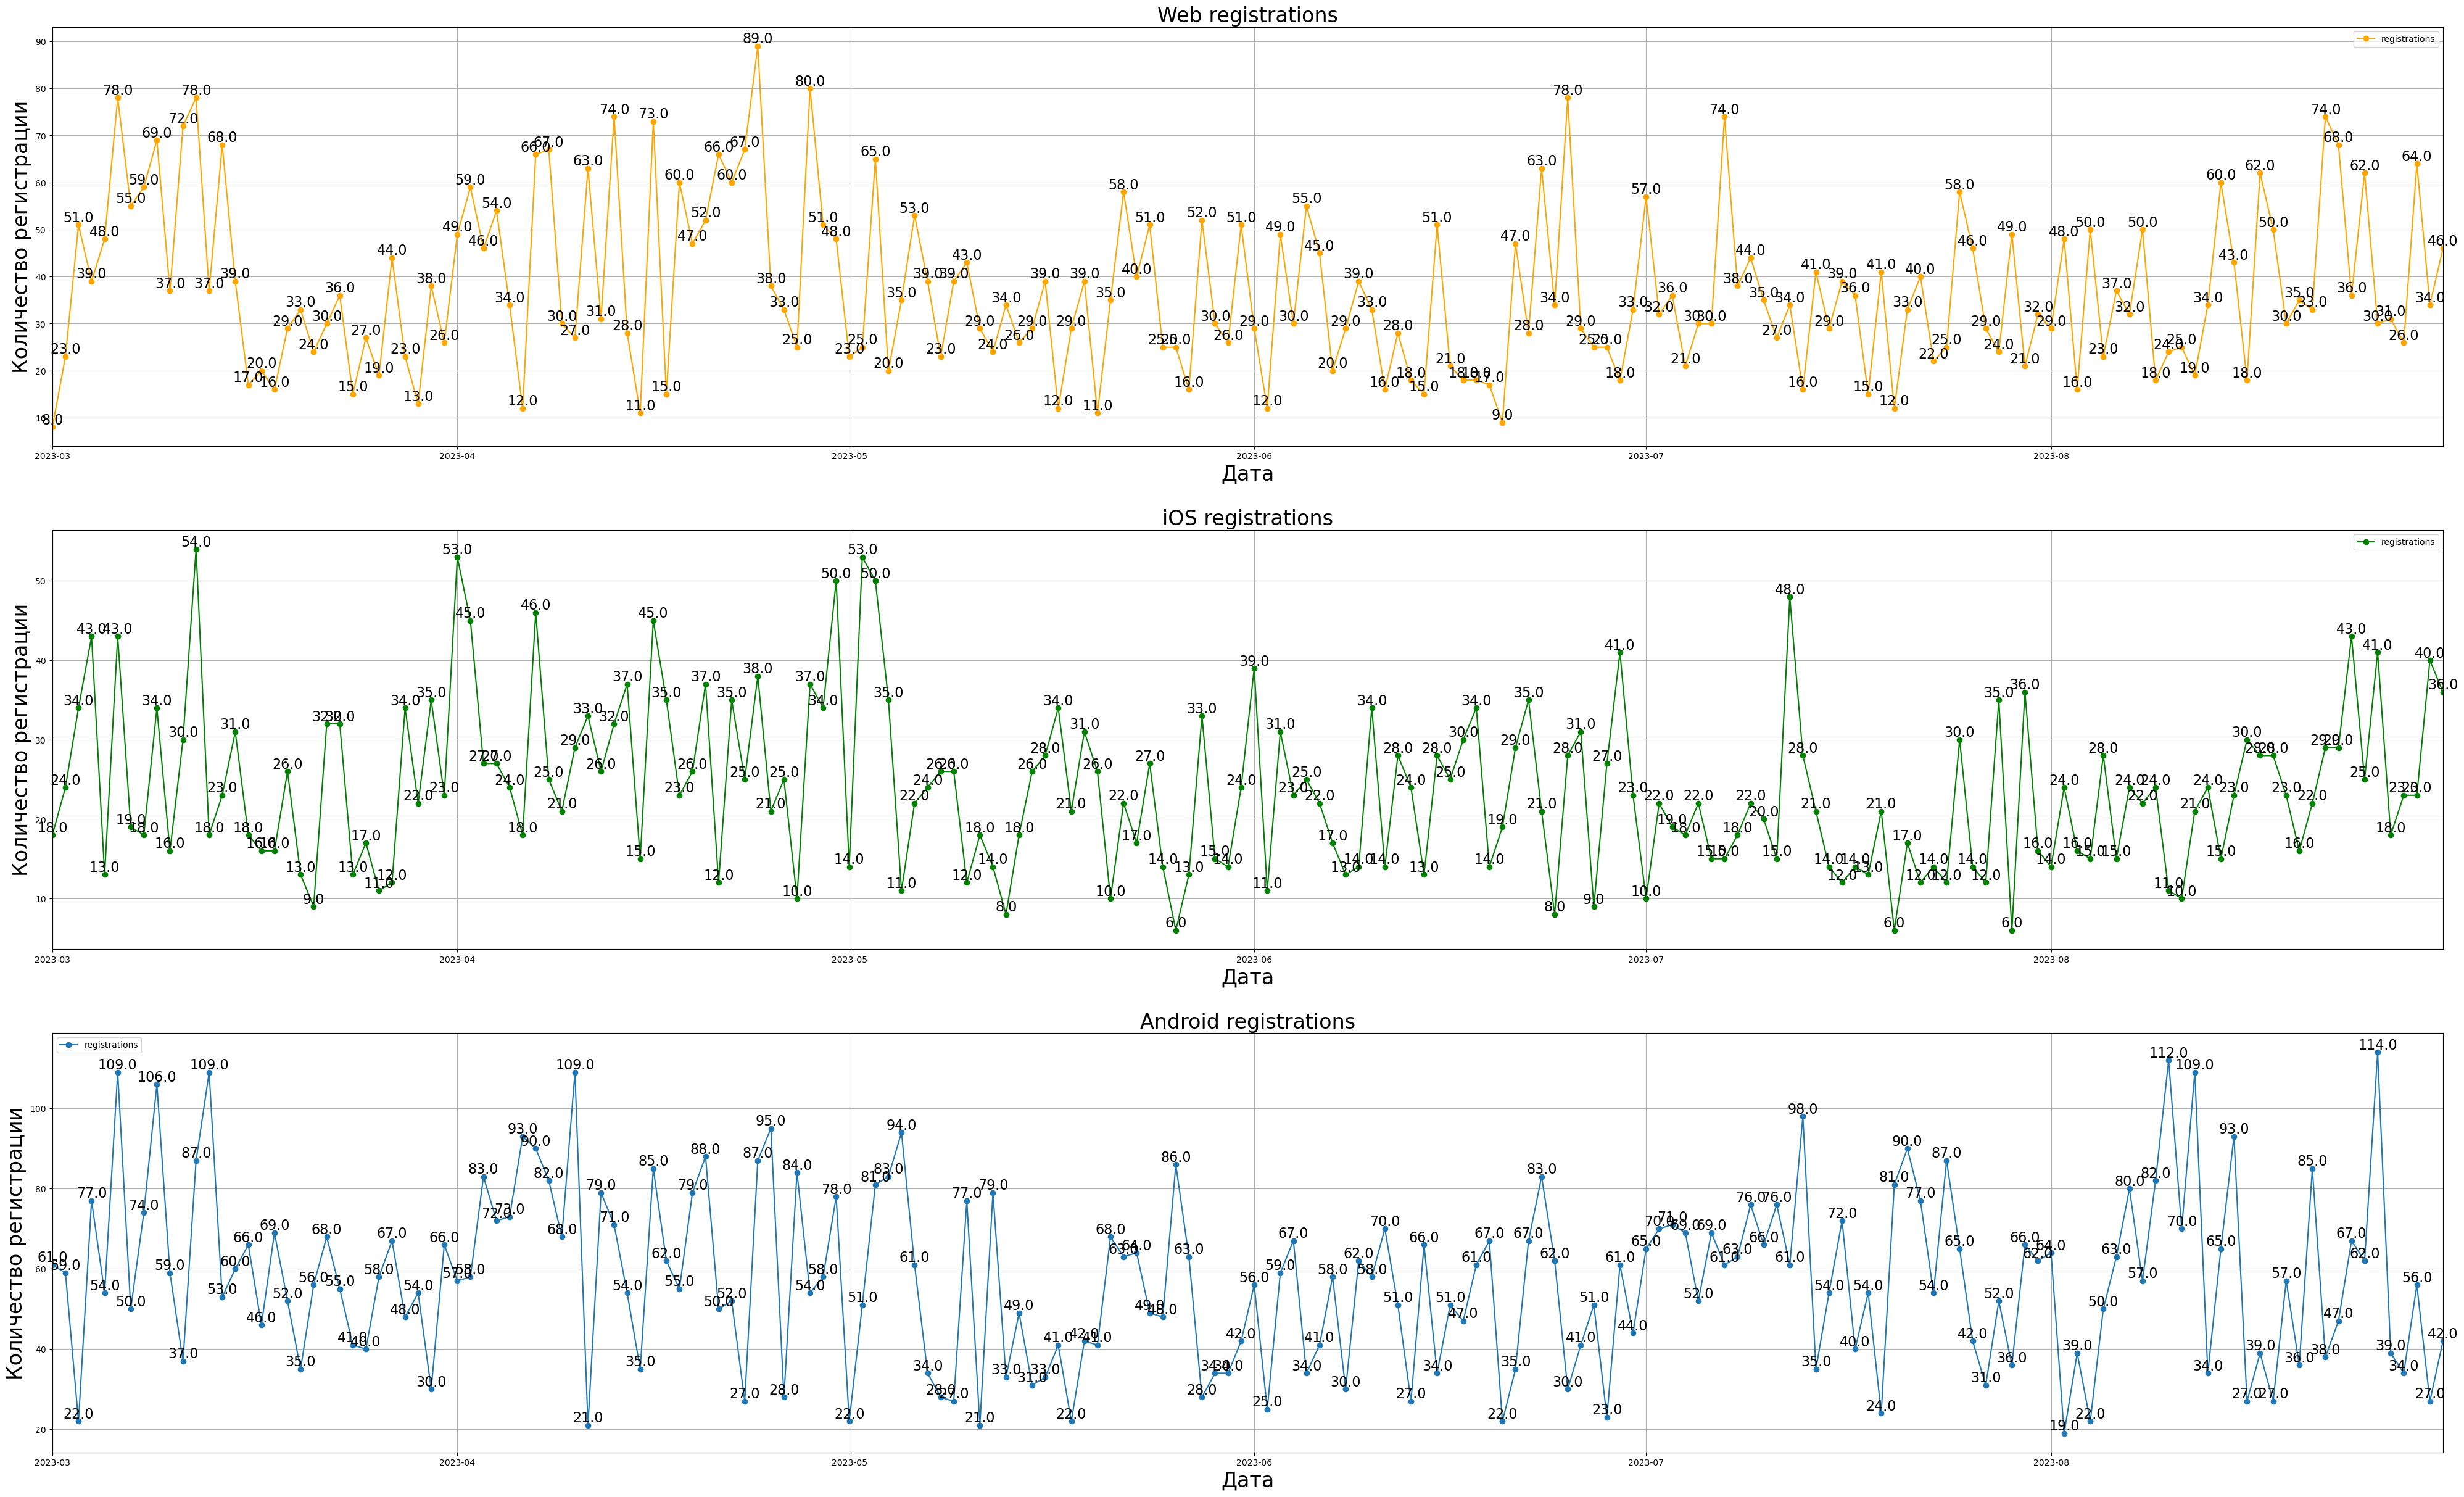

In [447]:
fig, ax = plt.subplots(3, 1, figsize=(50, 30))

android[['date_group', 'registrations']].plot(
    kind='line',
    x='date_group',
    y='registrations',
    marker='o',
    grid=True,
    ax=ax[2]
)
ios[['date_group', 'registrations']].plot(
    kind='line',
    x='date_group',
    y='registrations',
    marker='o',
    grid=True,
    ax=ax[1],
    color='green'
)
web[['date_group', 'registrations']].plot(
    kind='line',
    x='date_group',
    y='registrations',
    marker='o',
    grid=True,
    ax=ax[0],
    color='orange'
)

ax[2].set_xlim(left=android['date_group'].min(), right=android['date_group'].max())
ax[2].set_title('Android registrations', fontsize=24)
ax[2].set_xlabel('Дата', fontsize=24)
ax[2].set_ylabel('Количество регистрации', fontsize=24)
ax[1].set_xlim(left=ios['date_group'].min(), right=ios['date_group'].max())
ax[1].set_title('iOS registrations', fontsize=24)
ax[1].set_xlabel('Дата', fontsize=24)
ax[1].set_ylabel('Количество регистрации', fontsize=24)
ax[0].set_xlim(left=web['date_group'].min(), right=web['date_group'].max())
ax[0].set_title('Web registrations', fontsize=24)
ax[0].set_xlabel('Дата', fontsize=24)
ax[0].set_ylabel('Количество регистрации', fontsize=24)


# Android
for x, y in zip(android['date_group'], android['registrations']):
    ax[2].text(x, y, str(y), fontsize=16, ha='center', va='bottom')

# iOS
for x, y in zip(ios['date_group'], ios['registrations']):
    ax[1].text(x, y, str(y), fontsize=16, ha='center', va='bottom')

# Web
for x, y in zip(web['date_group'], web['registrations']):
    ax[0].text(x, y, str(y), fontsize=16, ha='center', va='bottom')

plt.savefig('./charts/registrations_dynamic_by_platforom.png')

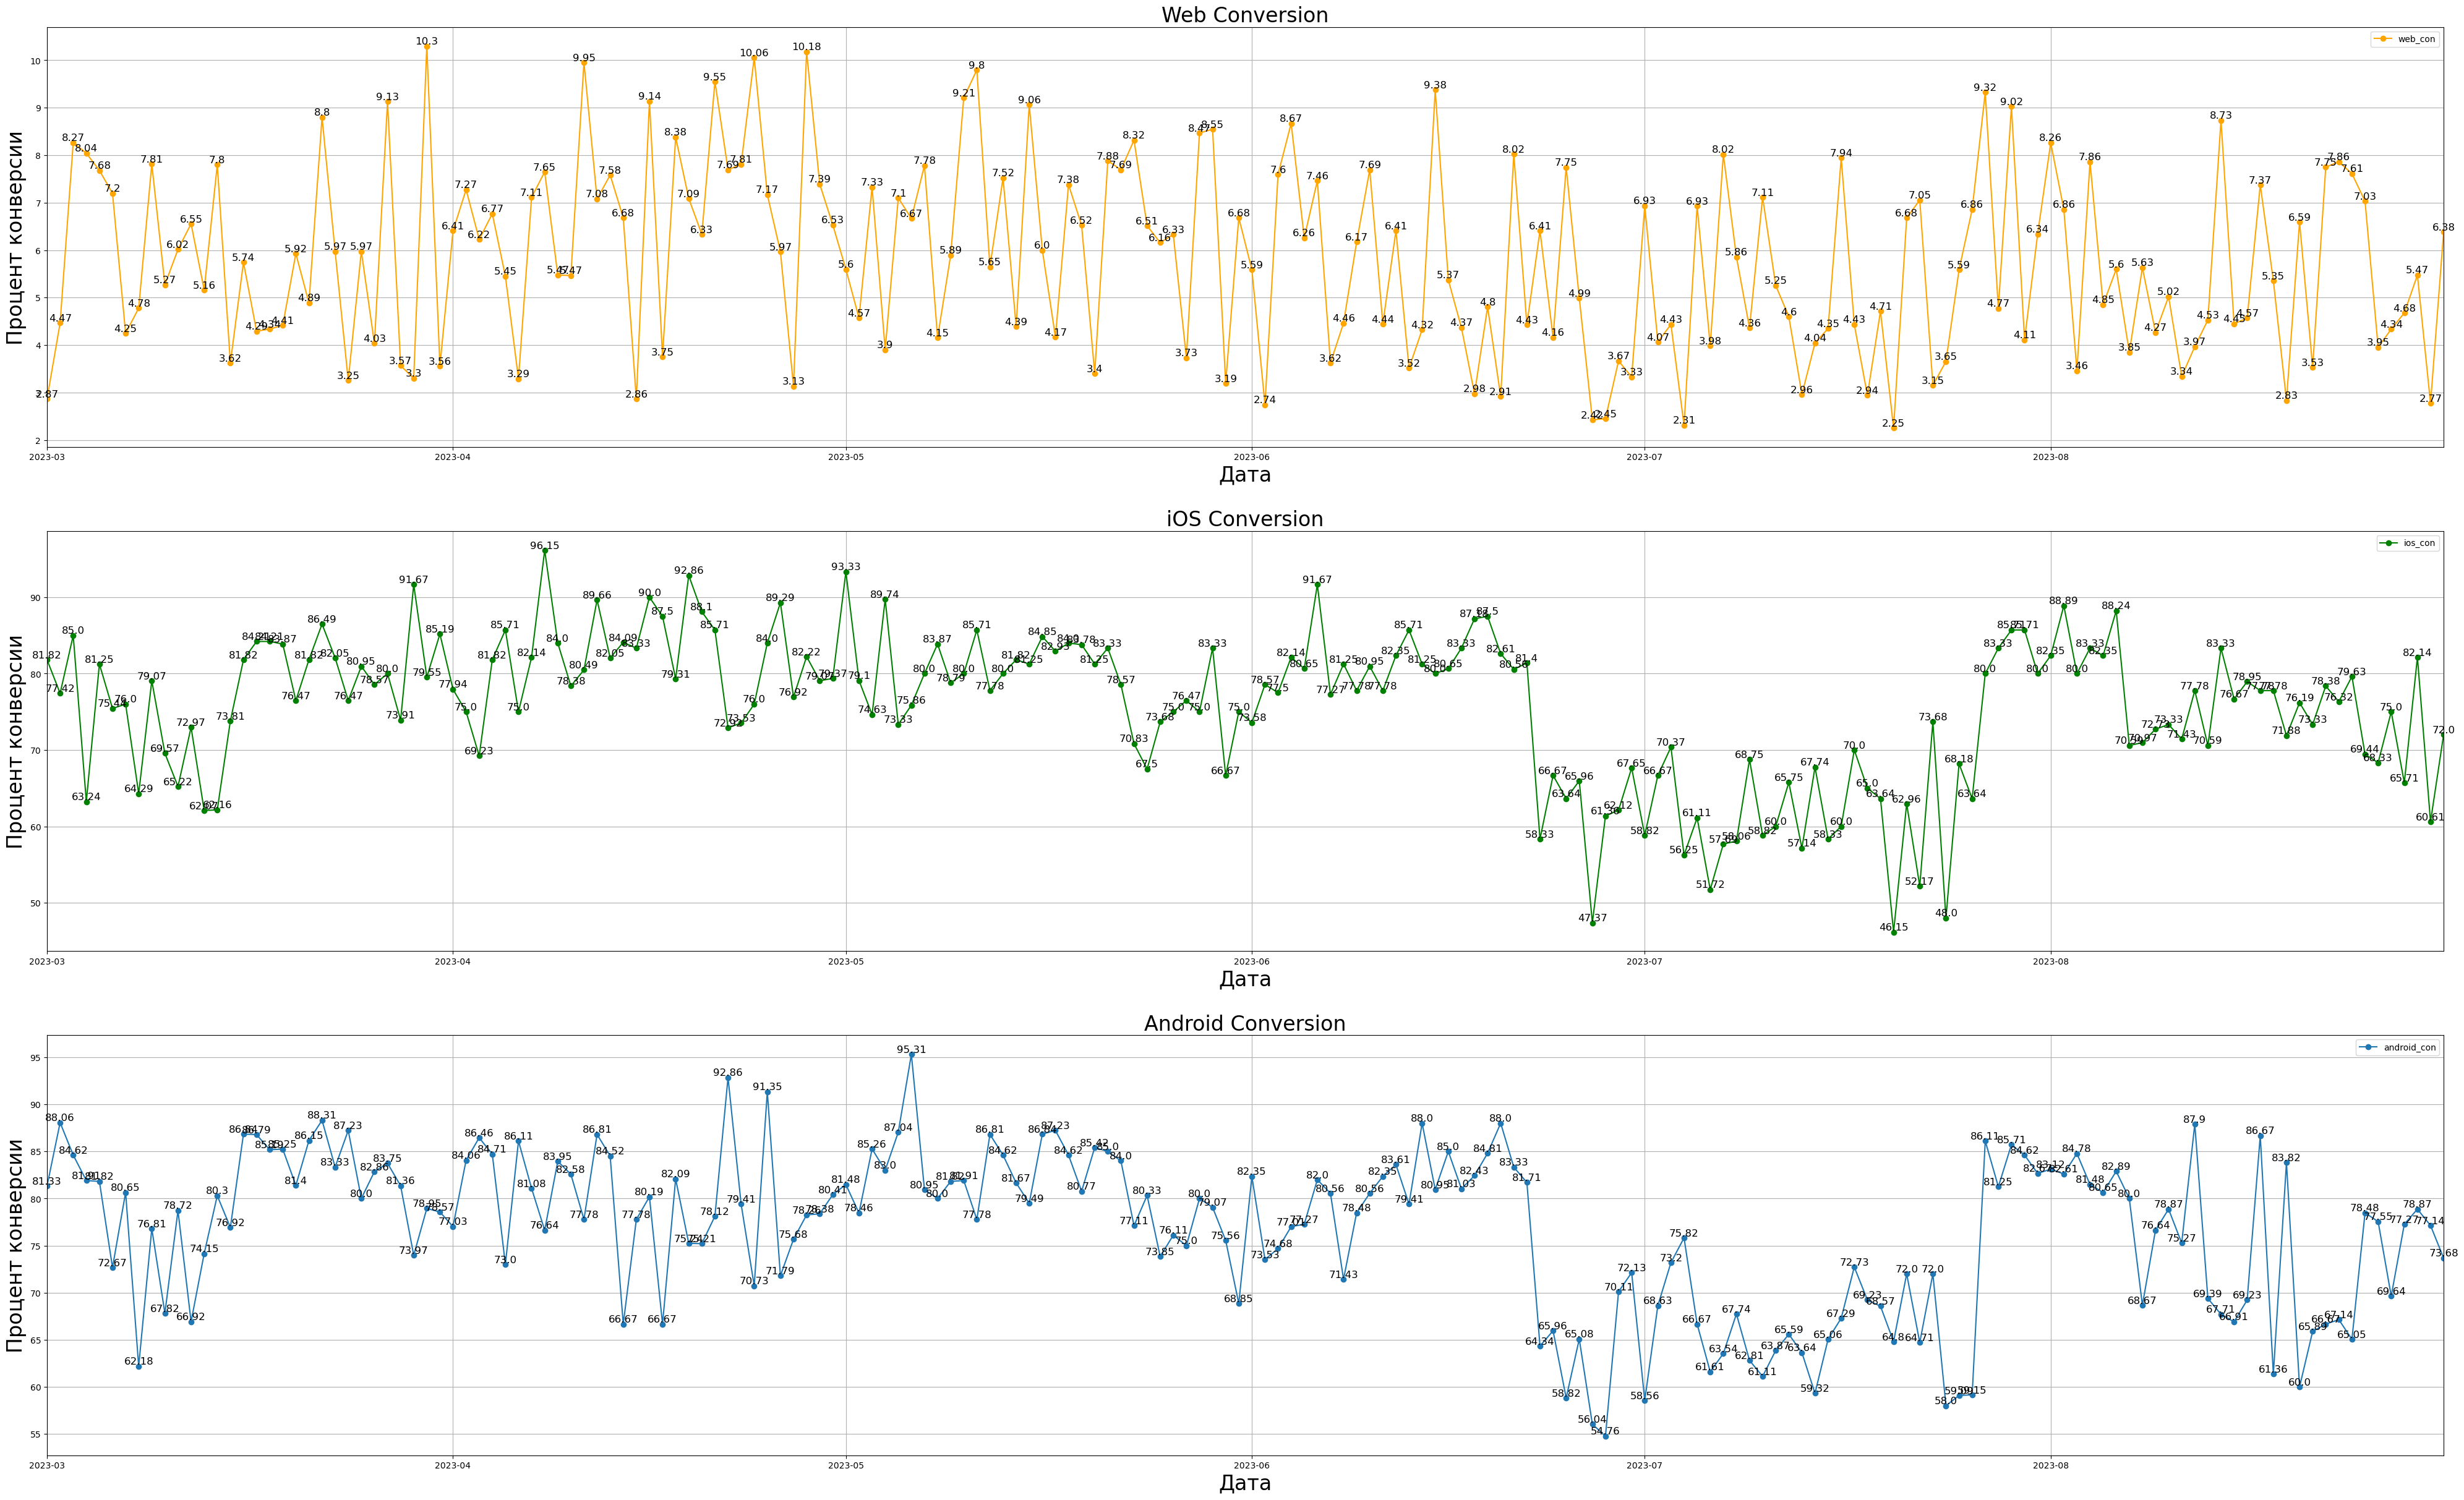

In [448]:
fig, ax = plt.subplots(3, 1, figsize=(50, 30))

# android
android['android_con'] = android['registrations'] * 100.00 / android['visits']
android[['android_con', 'date_group']].plot(
    x='date_group',
    y='android_con',
    grid=True,
    marker='o',
    ax=ax[2]
)

# ios
ios['ios_con'] = ios['registrations'] * 100.00 / ios['visits']
ios[['ios_con', 'date_group']].plot(
    x='date_group',
    y='ios_con',
    grid=True,
    marker='o',
    ax=ax[1],
    color='green'
)

# web
web['web_con'] = web['registrations'] * 100.00 / web['visits']
web[['web_con', 'date_group']].plot(
    x='date_group',
    y='web_con',
    grid=True,
    marker='o',
    ax=ax[0],
    color='orange'
)

ax[2].set_xlim(left=android['date_group'].min(), right=android['date_group'].max())
ax[2].set_title('Android Conversion', fontsize=24)
ax[2].set_xlabel("Дата", fontsize=24)
ax[2].set_ylabel('Процент конверсии', fontsize=24)

ax[1].set_xlim(left=ios['date_group'].min(), right=ios['date_group'].max())
ax[1].set_title('iOS Conversion', fontsize=24)
ax[1].set_xlabel("Дата", fontsize=24)
ax[1].set_ylabel('Процент конверсии', fontsize=24)

ax[0].set_xlim(left=web['date_group'].min(), right=web['date_group'].max())
ax[0].set_title('Web Conversion', fontsize=24)
ax[0].set_xlabel("Дата", fontsize=24)
ax[0].set_ylabel('Процент конверсии', fontsize=24)

for x, y in zip(android['date_group'], android['android_con']):
    ax[2].text(x, y, str(round(y, 2)), fontsize=12, ha='center', va='bottom')

for x, y in zip(ios['date_group'], ios['ios_con']):
    ax[1].text(x, y, str(round(y, 2)), fontsize=12, ha='center', va='bottom')

for x, y in zip(web['date_group'], web['web_con']):
    ax[0].text(x, y, str(round(y, 2)), fontsize=12, ha='center', va='bottom')

plt.savefig('./charts/conversion_by_platform.png')

In [449]:
ads_viz = ads.groupby(['utm_campaign'])['cost'].agg('sum')
ads_viz

utm_campaign
advanced_algorithms_series    2824
intro_to_python_course        4690
none                             0
ui_ux_design_drive            4209
virtual_reality_workshop      9031
women_in_tech_symposium       6780
Name: cost, dtype: int64

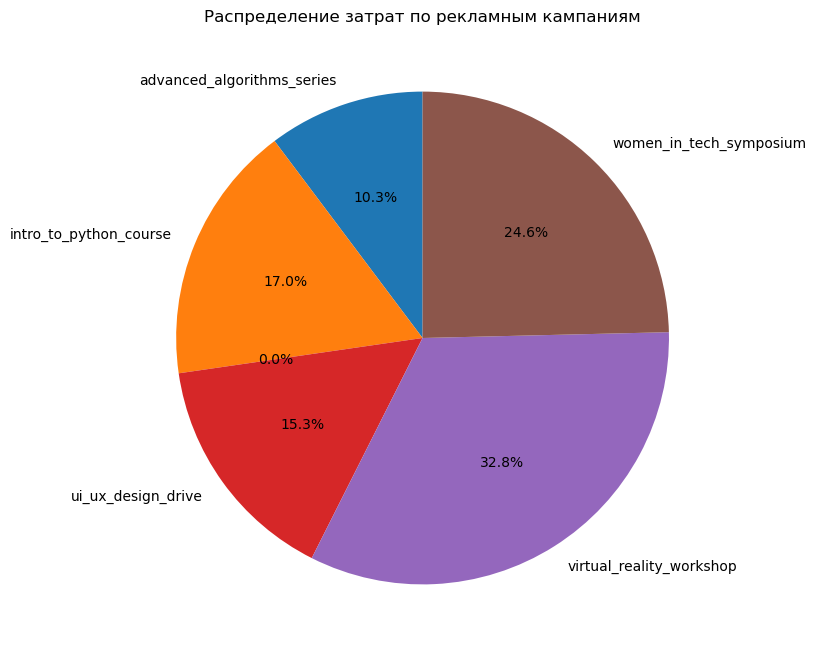

In [450]:
plt.figure(figsize=(8, 8))

ads_viz.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    ylabel='',
    title='Распределение затрат по рекламным кампаниям'
)

plt.savefig('./charts/pie_ads.png')

In [451]:
ads_second_viz = ads.groupby(['date_group', 'utm_campaign'])['cost'].agg('sum').reset_index()
ads_second_viz['date_group'] = ads_second_viz['date_group'].dt.date
ads_second_viz

date_group                utm_campaign  cost
0    2023-03-01  advanced_algorithms_series   212
1    2023-03-02  advanced_algorithms_series   252
2    2023-03-03  advanced_algorithms_series   202
3    2023-03-04  advanced_algorithms_series   223
4    2023-03-05  advanced_algorithms_series   265
..          ...                         ...   ...
179  2023-08-27      intro_to_python_course   222
180  2023-08-28      intro_to_python_course   223
181  2023-08-29      intro_to_python_course   190
182  2023-08-30      intro_to_python_course   109
183  2023-08-31      intro_to_python_course   215

[184 rows x 3 columns]

In [452]:
advanced_algorithms_series = ads_second_viz[ads_second_viz['utm_campaign'] == 'advanced_algorithms_series']
intro_to_python_course = ads_second_viz[ads_second_viz['utm_campaign'] == 'intro_to_python_course']
ui_ux_design_drive = ads_second_viz[ads_second_viz['utm_campaign'] == 'ui_ux_design_drive']
virtual_reality_workshop = ads_second_viz[ads_second_viz['utm_campaign'] == 'virtual_reality_workshop']
women_in_tech_symposium = ads_second_viz[ads_second_viz['utm_campaign'] == 'women_in_tech_symposium']

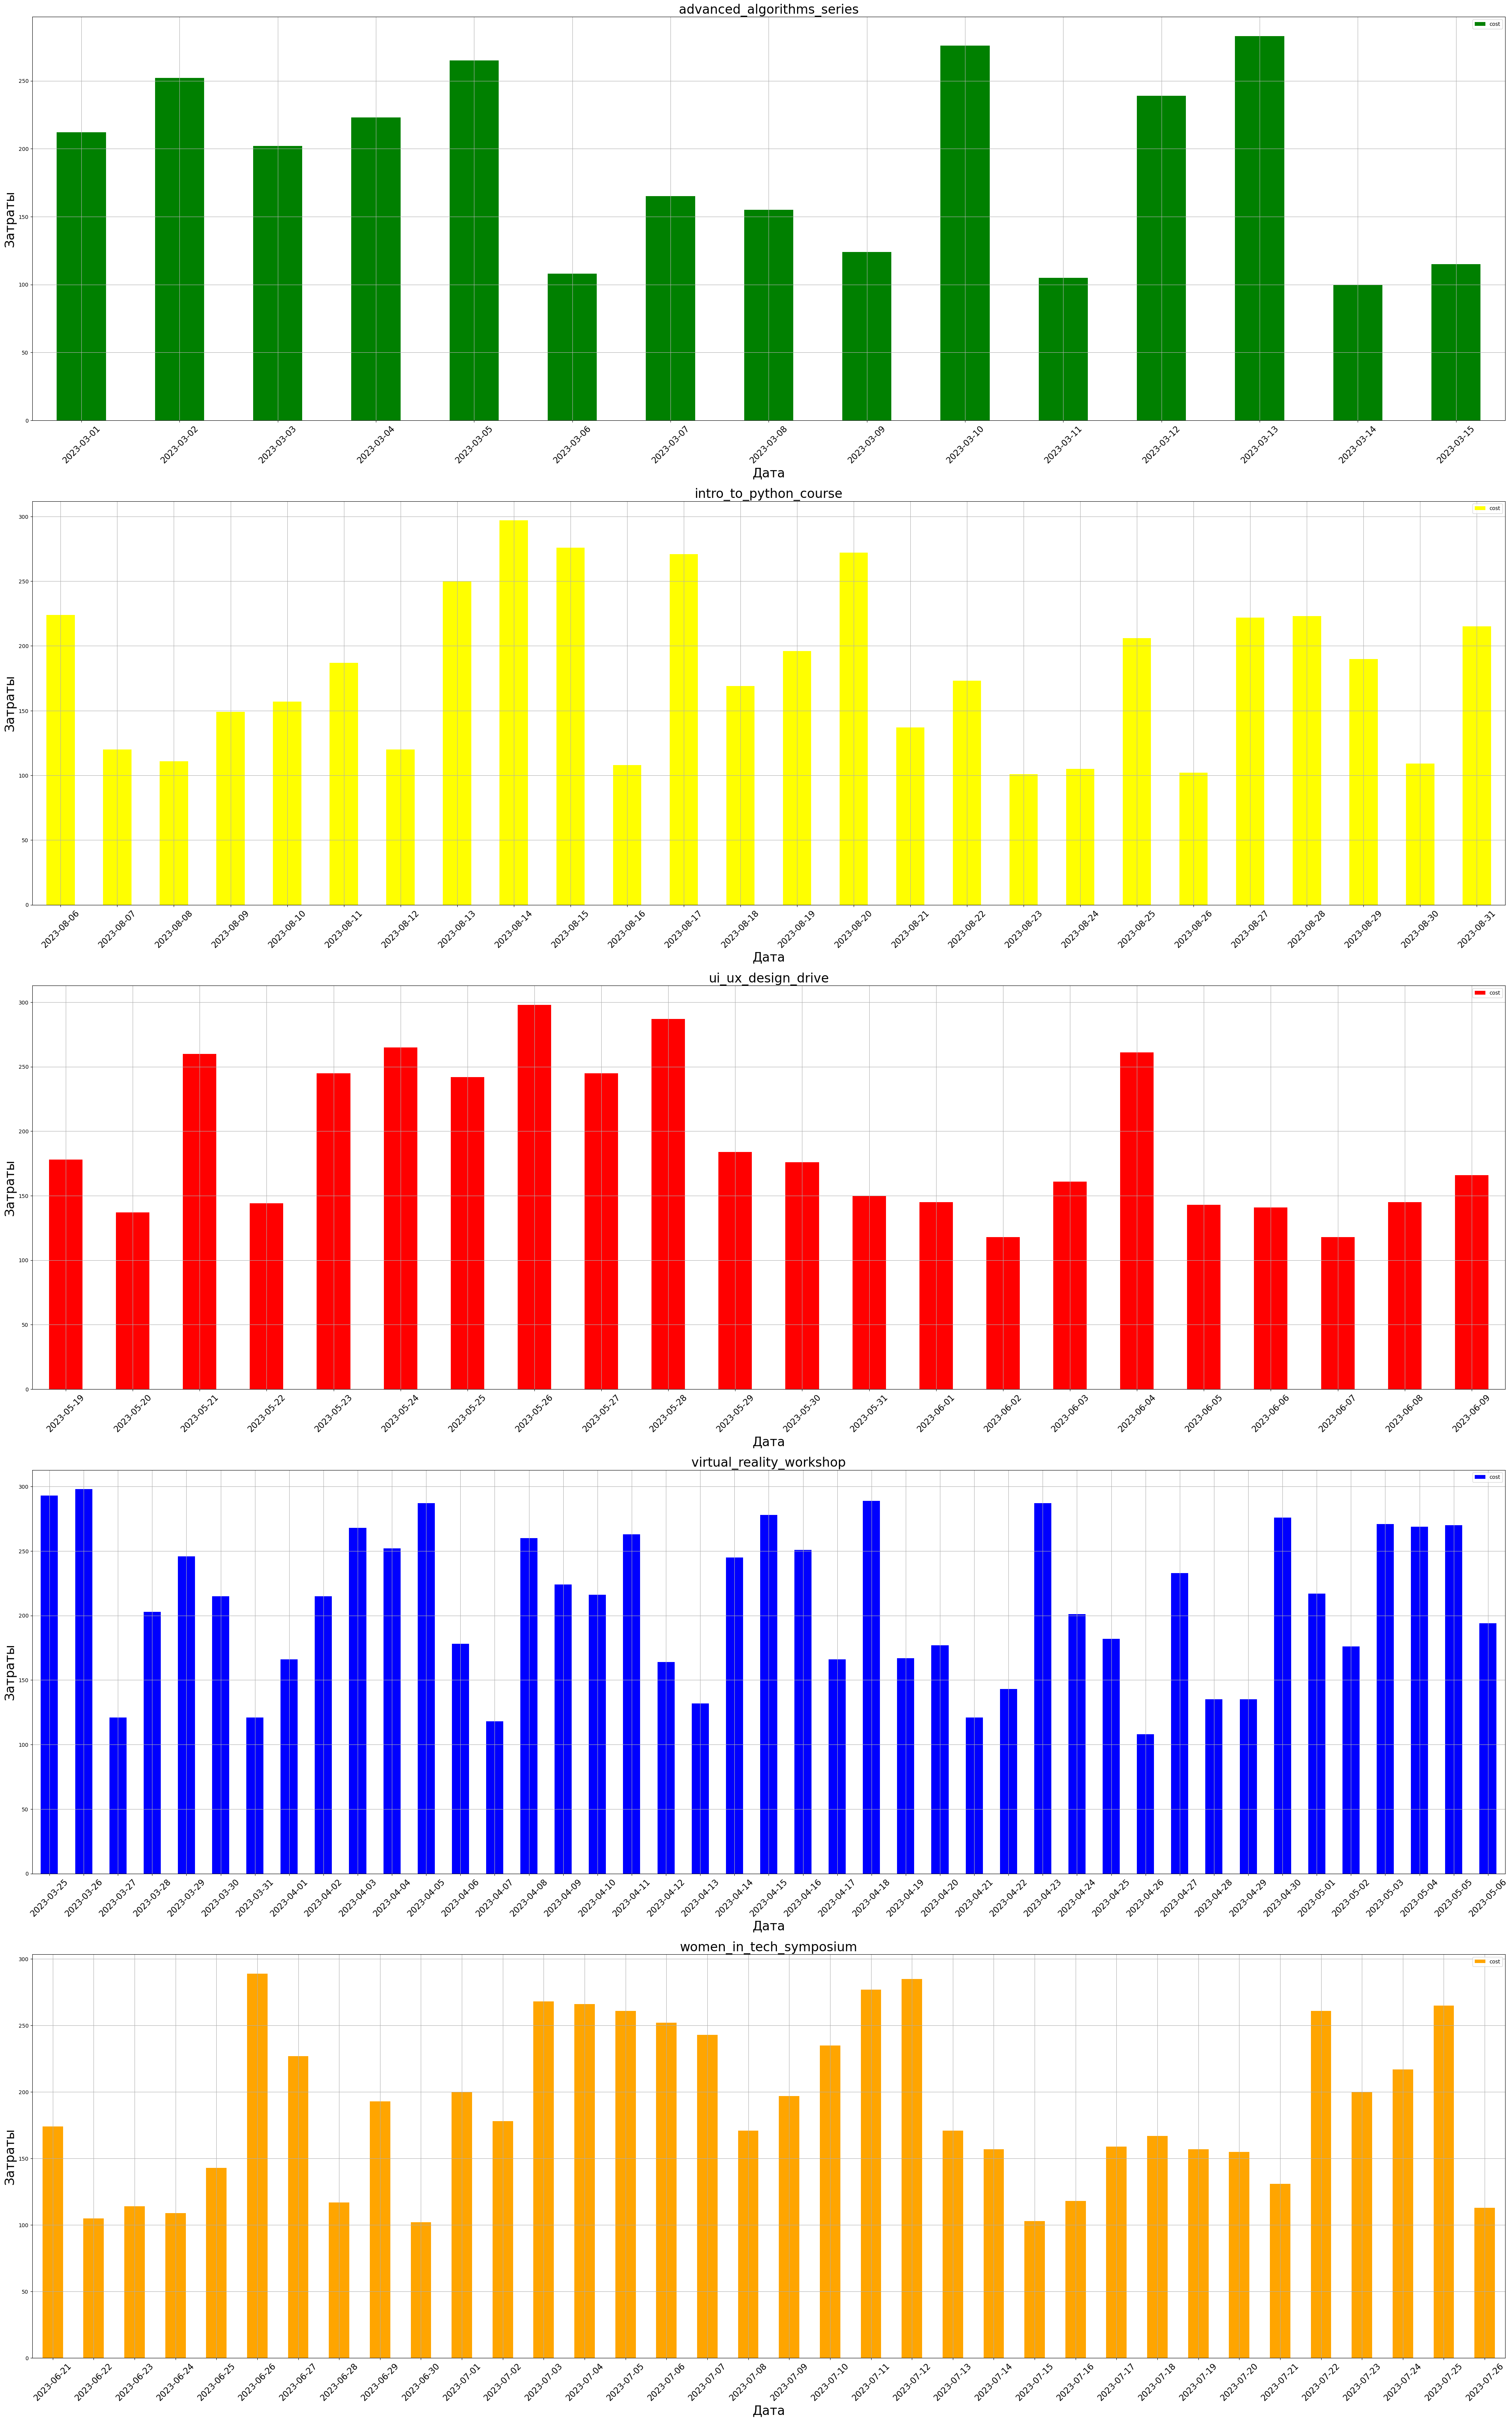

In [453]:
fig, ax = plt.subplots(5, 1, figsize=(50, 80))
advanced_algorithms_series[['date_group', 'cost']].plot(
    kind='bar',
    x='date_group',
    y='cost',
    grid=True,
    ax=ax[0],
    color='green'
)

intro_to_python_course[['date_group', 'cost']].plot(
    kind='bar',
    x='date_group',
    y='cost',
    grid=True,
    ax=ax[1],
    color='yellow'
)

ui_ux_design_drive[['date_group', 'cost']].plot(
    kind='bar',
    x='date_group',
    y='cost',
    grid=True,
    ax=ax[2],
    color='red'
)

virtual_reality_workshop[['date_group', 'cost']].plot(
    kind='bar',
    x='date_group',
    y='cost',
    grid=True,
    ax=ax[3],
    color='blue'
)

women_in_tech_symposium[['date_group', 'cost']].plot(
    kind='bar',
    x='date_group',
    y='cost',
    grid=True,
    ax=ax[4],
    color='orange'
)
titles = ['advanced_algorithms_series', 'intro_to_python_course', 'ui_ux_design_drive', 'virtual_reality_workshop', 'women_in_tech_symposium']

for i in range(5):
    ax[i].tick_params(axis='x', labelrotation=45, labelsize=16)
    ax[i].set_xlabel('Дата', fontsize=24)
    ax[i].set_ylabel('Затраты', fontsize=24)
    ax[i].set_title(titles[i], fontsize=24)

plt.savefig('./charts/every_ads.png')

In [454]:
visits_agg

visit_id  user_agent  datetime
date_group platform                                
2023-03-01 android         75          75        75
           ios             22          22        22
           web            279         279       279
2023-03-02 android         67          67        67
           ios             31          31        31
...                       ...         ...       ...
2023-08-30 ios             66          66        66
           web           1227        1227      1227
2023-08-31 android         57          57        57
           ios             50          50        50
           web            721         721       721

[594 rows x 3 columns]

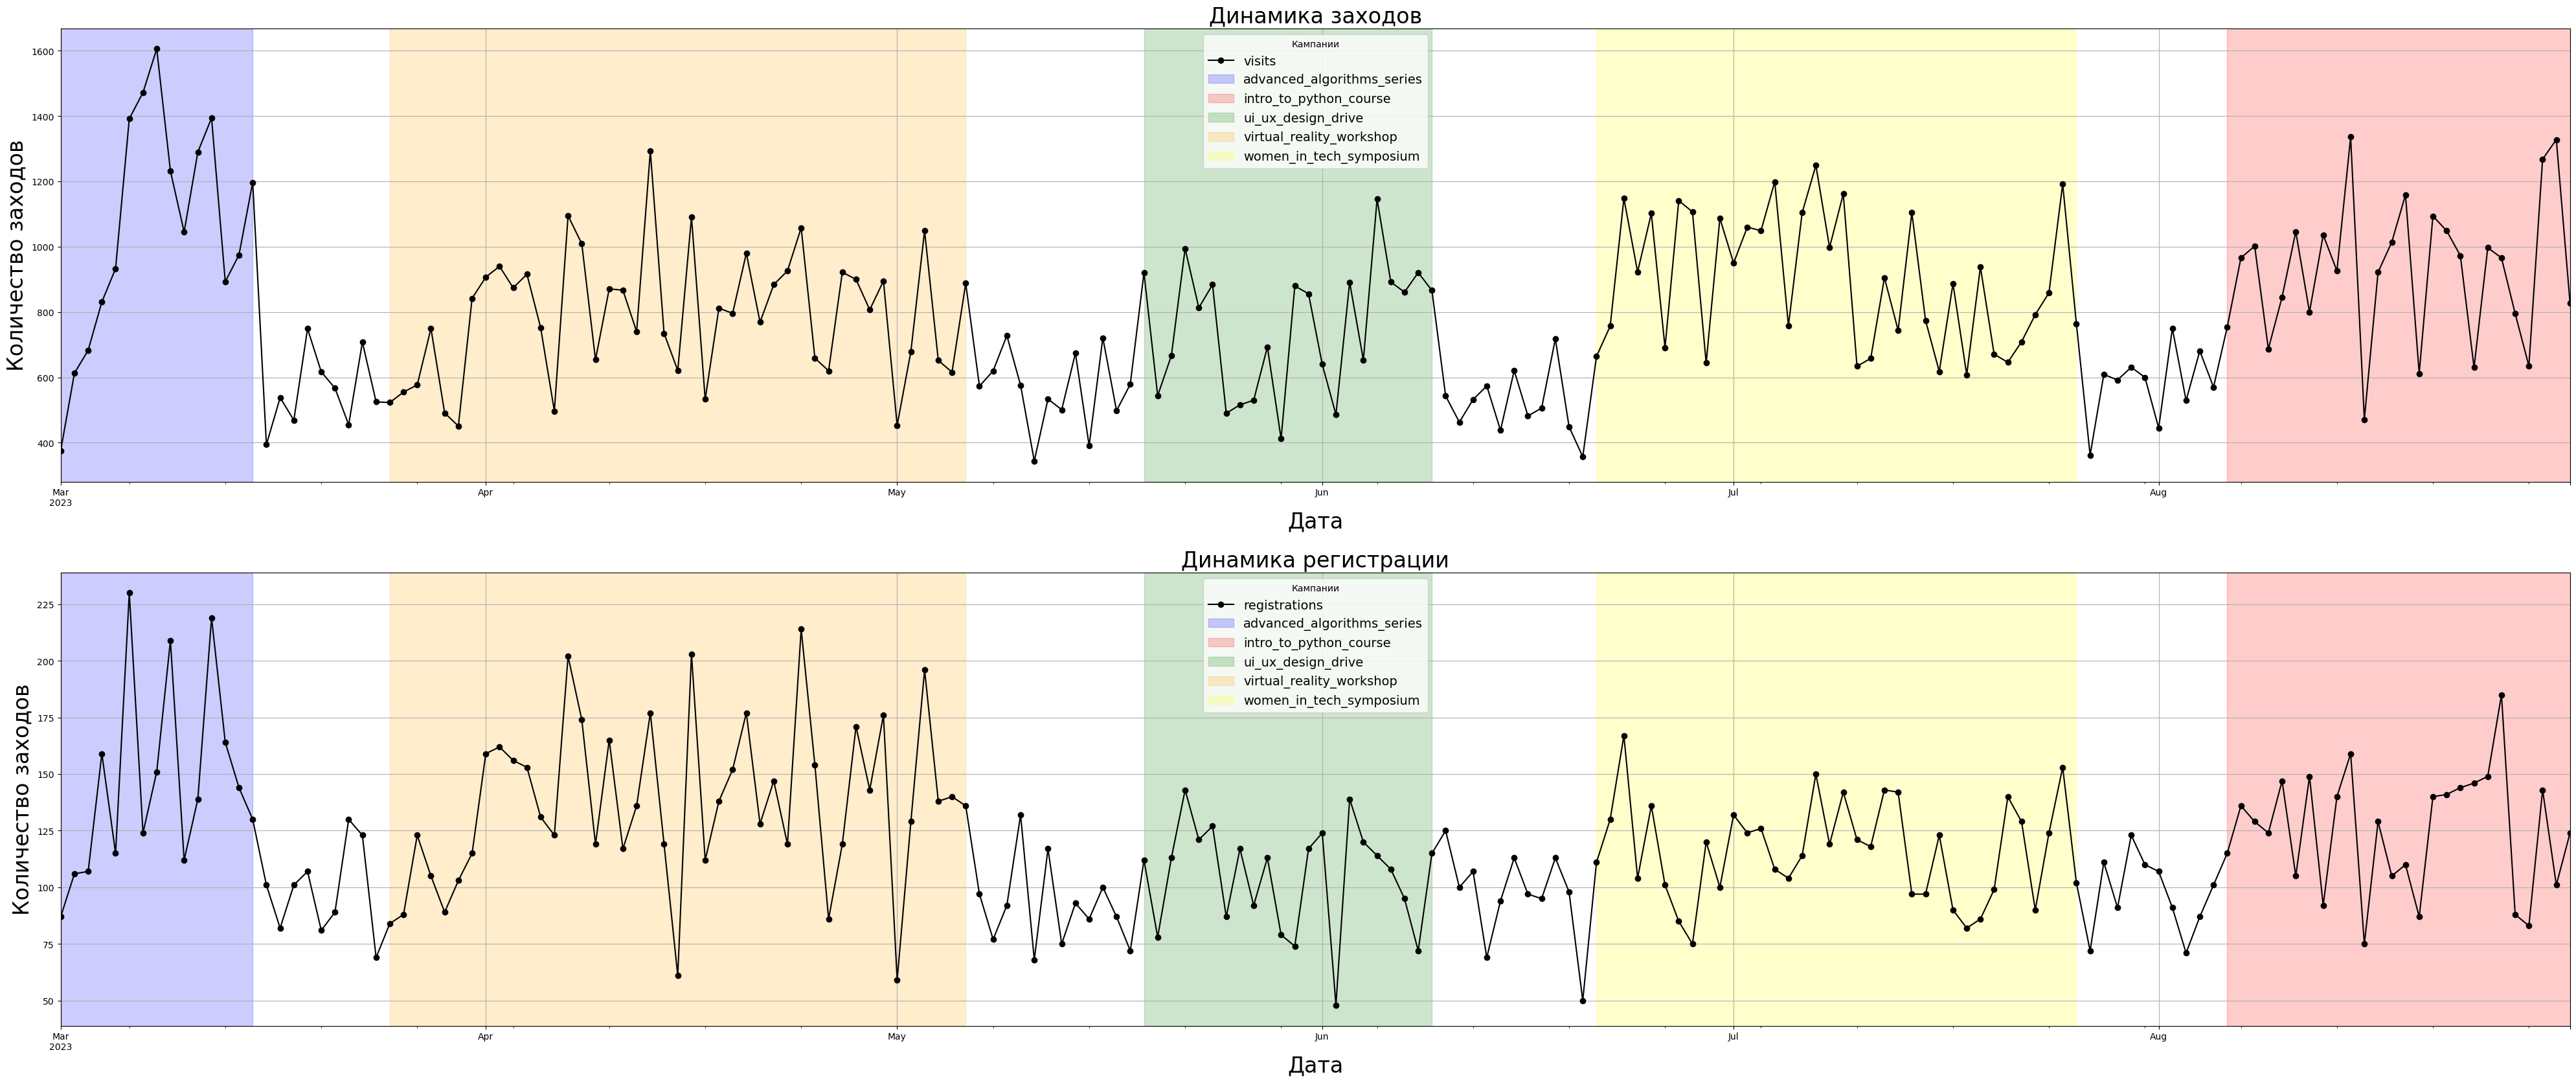

In [485]:
res = ads.groupby(['utm_campaign'])['date_group'].agg(['min', 'max']).reset_index()
res = res[res['utm_campaign'] != 'none'].reset_index(drop=True)
res['color'] = ['blue', 'red', 'green', 'orange', 'yellow']

fig, ax = plt.subplots(2, 1, figsize=(50, 20))
ads[['date_group', 'visits']].plot(
    x='date_group', 
    y='visits',
    ax=ax[0], 
    color='black', 
    marker='o'
)
ax[0].set_title('Динамика заходов', fontsize=24)
ax[0].set_ylabel('Количество заходов', fontsize=24)
ax[0].set_xlabel('Дата', fontsize=24)
ax[0].grid(True)
ax[0].set_xlim(left=ads['date_group'].min(), right=ads['date_group'].max())

ads[['date_group', 'registrations']].plot(
    x='date_group', 
    y='registrations',
    ax=ax[1], 
    color='black',
    marker='o'
)
ax[1].set_title('Динамика регистрации', fontsize=24)
ax[1].set_ylabel('Количество заходов', fontsize=24)
ax[1].set_xlabel('Дата', fontsize=24)
ax[1].grid(True)
ax[1].set_xlim(left=ads['date_group'].min(), right=ads['date_group'].max())

used_labels = set()

for _, row in res.iterrows():
    label = row['utm_campaign'] if row['utm_campaign'] not in used_labels else None
    ax[0].axvspan(row['min'], row['max'], color=row['color'], alpha=0.2, label=label)
    ax[1].axvspan(row['min'], row['max'], color=row['color'], alpha=0.2, label=label)
    used_labels.add(row['utm_campaign'])

ax[0].legend(title="Кампании", fontsize=14)
ax[1].legend(title="Кампании", fontsize=14)

plt.savefig('./charts/dynamic_visits_and_regs_with_ads.png')

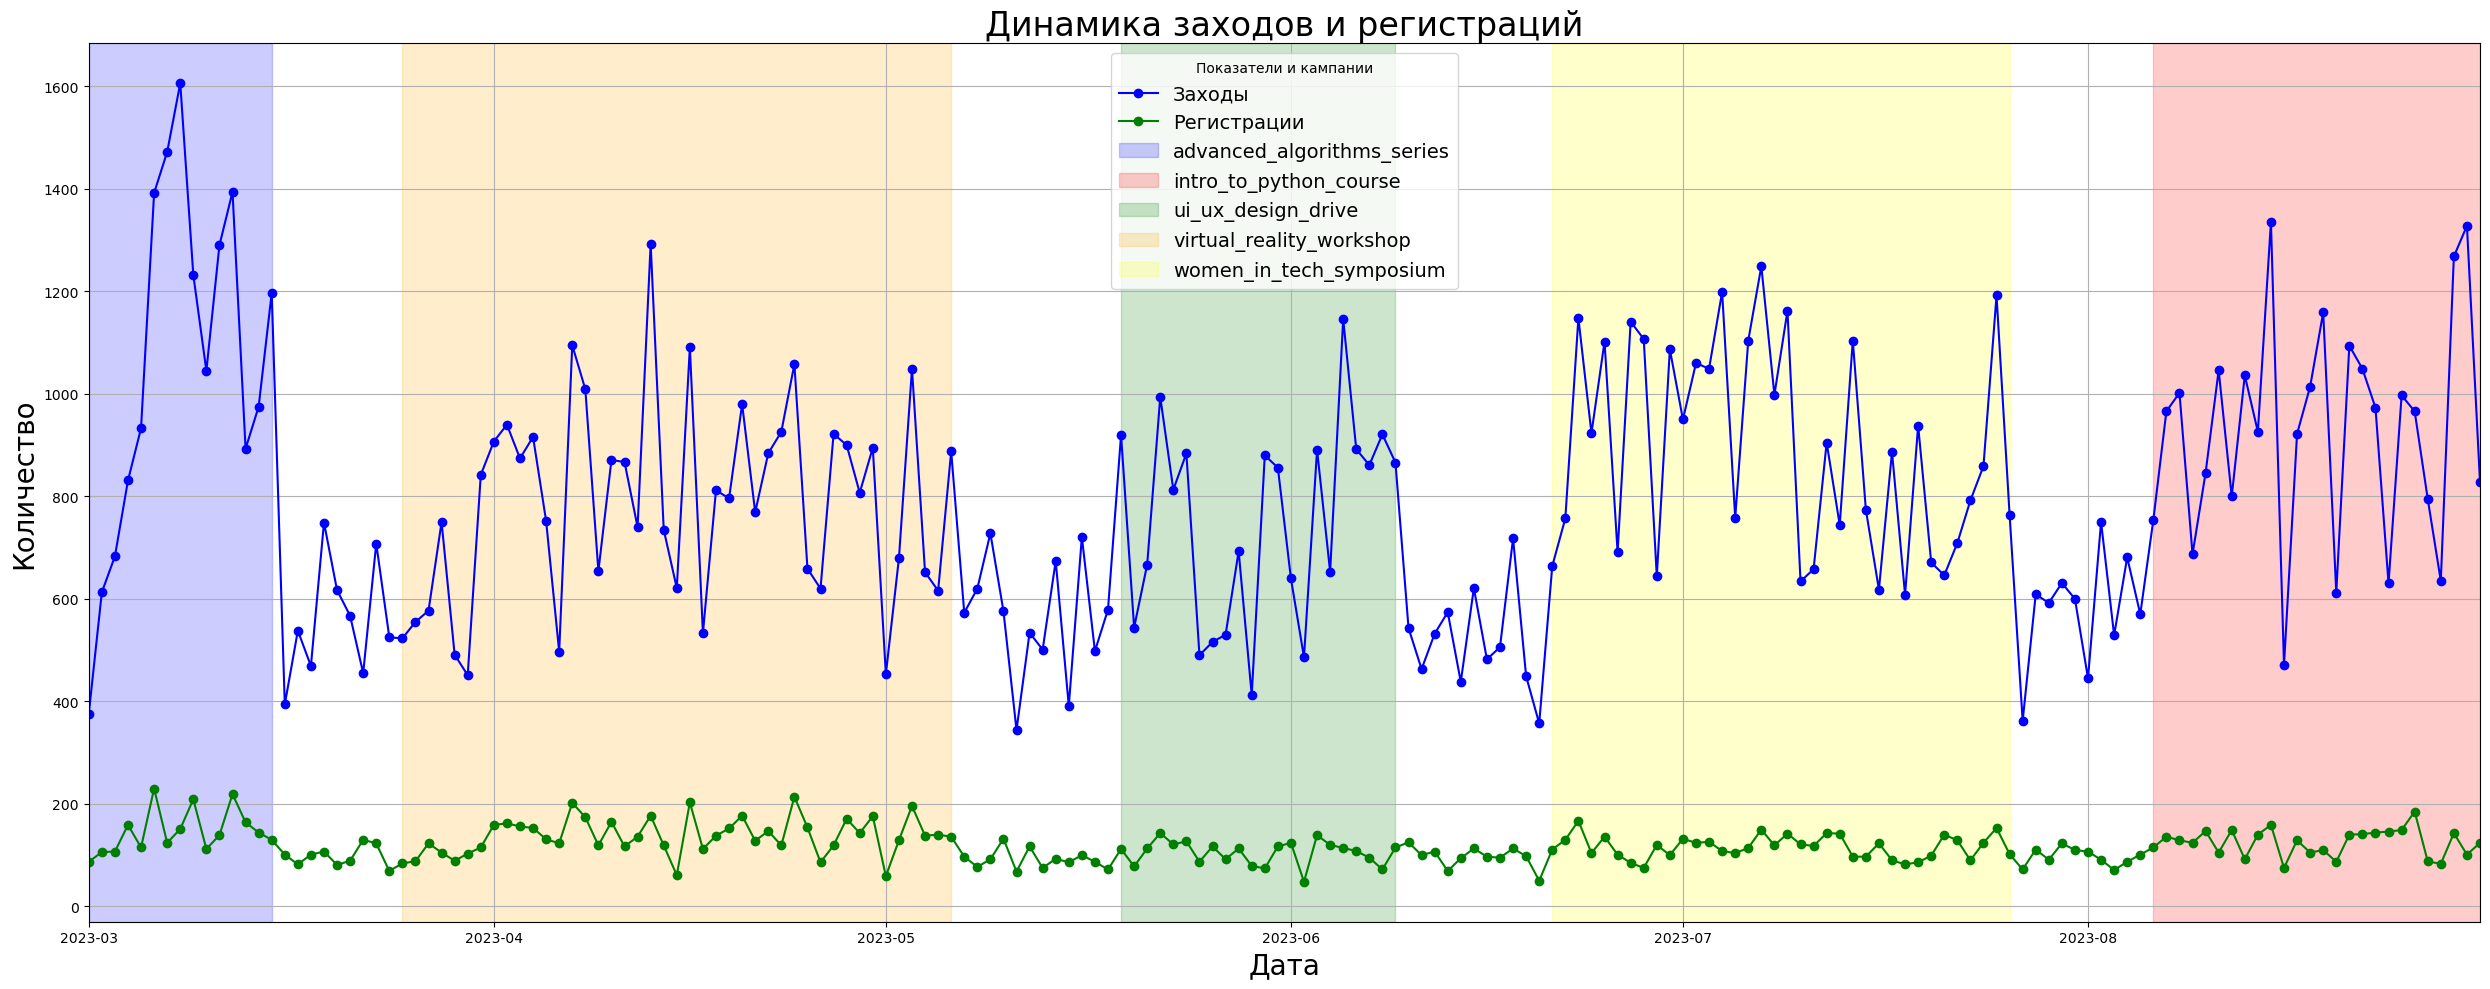

In [503]:
fig, ax = plt.subplots(figsize=(25, 10))

# Отображаем обе метрики на одной оси
ax.plot(ads['date_group'], ads['visits'], color='blue', marker='o', label='Заходы')
ax.plot(ads['date_group'], ads['registrations'], color='green', marker='o', label='Регистрации')

# Настройка осей и заголовков
ax.set_title('Динамика заходов и регистраций', fontsize=24)
ax.set_ylabel('Количество', fontsize=20)
ax.set_xlabel('Дата', fontsize=20)
ax.grid(True)
ax.set_xlim(left=ads['date_group'].min(), right=ads['date_group'].max())

# Закрашивание рекламных интервалов
used_labels = set()
for _, row in res.iterrows():
    label = row['utm_campaign'] if row['utm_campaign'] not in used_labels else None
    ax.axvspan(row['min'], row['max'], color=row['color'], alpha=0.2, label=label)
    used_labels.add(row['utm_campaign'])

# Легенда: сначала метрики, потом кампании без дубликатов
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), title='Показатели и кампании', fontsize=14)

plt.tight_layout()

plt.savefig('./charts/both_metrics.png')